In [1]:
# =====================================
# Title: Movie Audience Rating Prediction
# =====================================

# ===========================================
# Source Code and Project Details
# ===========================================

This is my source code. The complete setup instructions and project explanation are available in the README file of my GitHub repository. You can access it [https://github.com/SathishMadhiyalagan/RottenTomatoesMoviesModel](https://github.com/SathishMadhiyalagan/RottenTomatoesMoviesModel).


In [2]:
# Import Required Libraries
# =====================================
# Import libraries for data processing, visualization, and machine learning models
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler, MultiLabelBinarizer  # For data preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear regression models
from sklearn.ensemble import RandomForestRegressor, VotingRegressor  # Ensemble models for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For model evaluation metrics
from scipy.sparse import csr_matrix  # To handle sparse matrices efficiently
from collections import Counter  # To handle frequency-based operations on categorical data
import warnings  # To manage warnings in code execution

warnings.filterwarnings("ignore")  # Ignore unnecessary warnings

In [3]:
# =====================================
# Step 1: Load and Inspect the Dataset
# =====================================
# Load the dataset
data = pd.read_excel('Rotten_Tomatoes_Movies3.xls')  # Replace with your dataset path


In [4]:
# View the first few rows to understand the dataset structure
data.head()

movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of Disney's finest live-action adventures,...      G   

                                               genre          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

             writers                                               cast  \
0       Craig Titley  Logan Lerman, Brandon T. Jackson, Alexandra Da...   
1  Nicole Holofcener  Catherine Keener, Amanda Peet, Oliver Platt, R...   
2      Blake Edwards  Dudley Moore, Bo Derek, Julie Andrews, Robert ...   
3      Reginald Rose  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....   
4        Earl Felton  James Mason, Kirk Douglas, Paul Lukas, Peter L...   

  in_theaters_date on_streaming_date  runtime_in_minutes  \
0       2010-02-12        2010-06-29                83.0   
1       2010-04-30        2010-10-19                90.0   
2       1979-10-05        1997-08-27               118.0   
3       1957-04-13        2001-03-06                95.0   
4       1954-01-01        2003-05-20               127.0   

              studio_name tomatometer_status  tomatometer_rating  \
0        20th Century Fox             Rotten                  49   
1  Sony Pictures Classics    Certified Fresh                  86   
2             Waner Bros.              Fresh                  68   
3    Criterion Collection    Certified Fresh                 100   
4                  Disney              Fresh                  89   

   tomatometer_count  audience_rating  
0                144             53.0  
1                140             64.0  
2                 22             53.0  
3                 51             97.0  
4                 27             74.0

In [5]:
# Print the shape of the dataset (rows, columns)
print("Dataset Shape:", data.shape)

Dataset Shape: (16638, 16)


In [6]:
# Display detailed information about the dataset including column data types and null counts
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-nu

In [7]:
# Check and summarize missing values in each column
data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

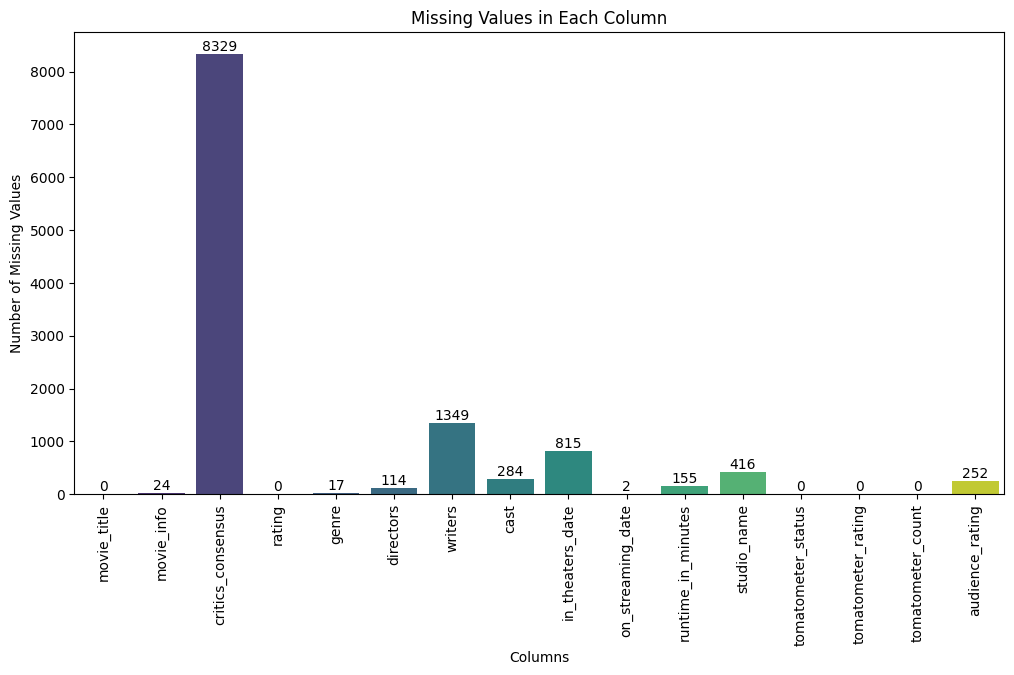

In [8]:
# Calculate missing values for visualization
missing_values = data.isnull().sum()

# Visualize missing values using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Annotate bar plot with the count of missing values
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title to the plot
plt.title("Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [9]:

# =====================================
# Step 2: Handle Missing Values
# =====================================
# Fill missing values in numerical columns with the median value
numerical_cols = ['runtime_in_minutes', 'audience_rating']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = ['genre', 'directors', 'writers', 'cast', 'rating']
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Fill missing date columns with their mode value
data['in_theaters_date'] = data['in_theaters_date'].fillna(data['in_theaters_date'].mode()[0])
data['on_streaming_date'] = data['on_streaming_date'].fillna(data['on_streaming_date'].mode()[0])


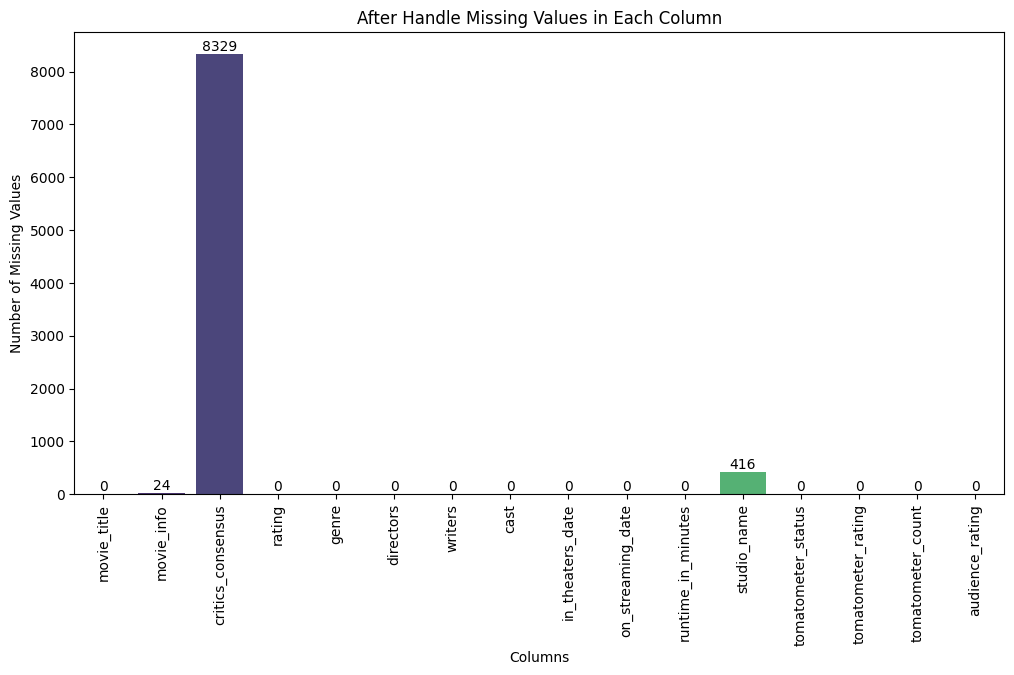

In [10]:
# After Handle Missing Values for visualization
missing_values = data.isnull().sum()

# Visualize missing values using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Annotate bar plot with the count of missing values
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title to the plot
plt.title("After Handle Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [11]:
# Drop irrelevant columns that do not contribute to the analysis or modeling
data = data.drop(columns=['movie_title', 'movie_info', 'studio_name', 'critics_consensus'])


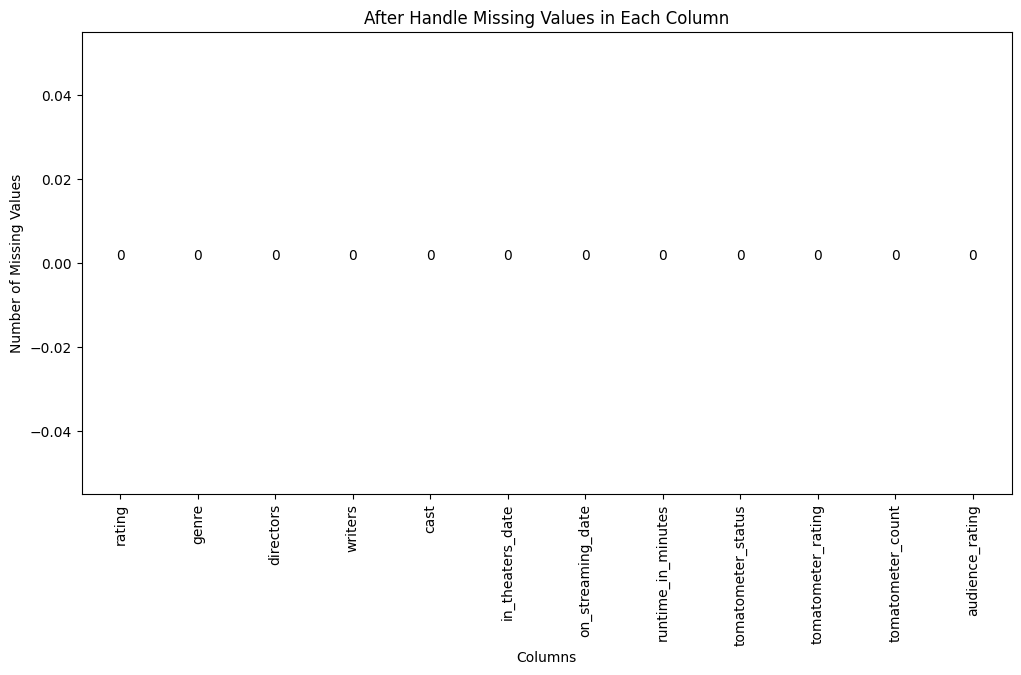

In [12]:
# After Handle Missing Values for visualization
missing_values = data.isnull().sum()

# Visualize missing values using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Annotate bar plot with the count of missing values
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title to the plot
plt.title("After Handle Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

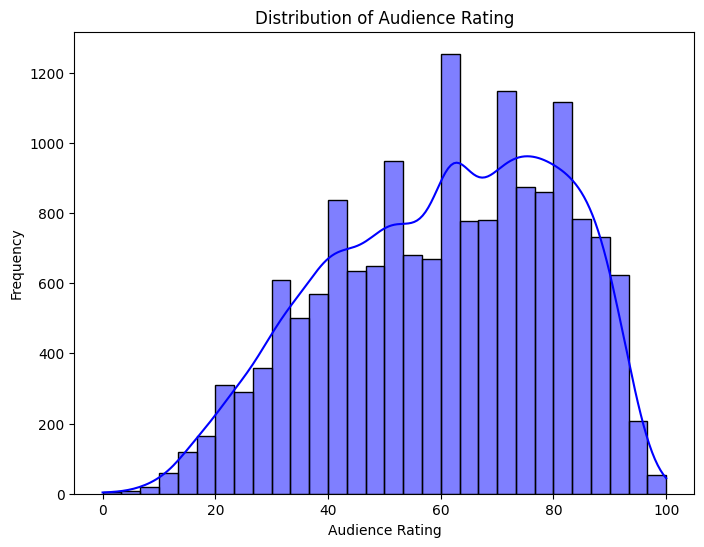

In [13]:
# =====================================
# Step 3: Exploratory Data Analysis (EDA)
# =====================================
# Distribution of Audience Rating
plt.figure(figsize=(8, 6))
sns.histplot(data['audience_rating'], bins=30, kde=True, color='blue')
plt.title("Distribution of Audience Rating")
plt.xlabel("Audience Rating")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Display the updated dataset information after handling missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rating              16638 non-null  object        
 1   genre               16638 non-null  object        
 2   directors           16638 non-null  object        
 3   writers             16638 non-null  object        
 4   cast                16638 non-null  object        
 5   in_theaters_date    16638 non-null  datetime64[ns]
 6   on_streaming_date   16638 non-null  datetime64[ns]
 7   runtime_in_minutes  16638 non-null  float64       
 8   tomatometer_status  16638 non-null  object        
 9   tomatometer_rating  16638 non-null  int64         
 10  tomatometer_count   16638 non-null  int64         
 11  audience_rating     16638 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 1.5+ MB


In [15]:
# Initialize a LabelEncoder to convert categorical features into numerical form
encoder = LabelEncoder()

# Encode 'tomatometer_status' column using LabelEncoder
data['tomatometer_status'] = encoder.fit_transform(data['tomatometer_status'])

# Remove unwanted characters from the 'rating' column and encode it
data['rating'] = data['rating'].str.replace(r'[)]+$', '', regex=True).str.strip()
data['rating'] = encoder.fit_transform(data['rating'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rating              16638 non-null  int64         
 1   genre               16638 non-null  object        
 2   directors           16638 non-null  object        
 3   writers             16638 non-null  object        
 4   cast                16638 non-null  object        
 5   in_theaters_date    16638 non-null  datetime64[ns]
 6   on_streaming_date   16638 non-null  datetime64[ns]
 7   runtime_in_minutes  16638 non-null  float64       
 8   tomatometer_status  16638 non-null  int64         
 9   tomatometer_rating  16638 non-null  int64         
 10  tomatometer_count   16638 non-null  int64         
 11  audience_rating     16638 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 1.5+ MB


In [17]:
# =====================================
# Additional Analysis and Visualization
# =====================================
# Extract year, month, and day features from the date columns for better analysis
data['in_theaters_date'] = pd.to_datetime(data['in_theaters_date'], errors='coerce')
data['on_streaming_date'] = pd.to_datetime(data['on_streaming_date'], errors='coerce')

for date_col in ['in_theaters_date', 'on_streaming_date']:
    data[f'{date_col}_year'] = data[date_col].dt.year
    data[f'{date_col}_month'] = data[date_col].dt.month
    data[f'{date_col}_day'] = data[date_col].dt.day

In [18]:

# Drop original date columns after extracting useful features
data = data.drop(columns=['in_theaters_date', 'on_streaming_date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating                   16638 non-null  int64  
 1   genre                    16638 non-null  object 
 2   directors                16638 non-null  object 
 3   writers                  16638 non-null  object 
 4   cast                     16638 non-null  object 
 5   runtime_in_minutes       16638 non-null  float64
 6   tomatometer_status       16638 non-null  int64  
 7   tomatometer_rating       16638 non-null  int64  
 8   tomatometer_count        16638 non-null  int64  
 9   audience_rating          16638 non-null  float64
 10  in_theaters_date_year    16638 non-null  int32  
 11  in_theaters_date_month   16638 non-null  int32  
 12  in_theaters_date_day     16638 non-null  int32  
 13  on_streaming_date_year   16638 non-null  int32  
 14  on_streaming_date_mont

In [20]:
data.head()

rating                                              genre  \
0       3  Action & Adventure, Comedy, Drama, Science Fic...   
1       5                                             Comedy   
2       5                                    Comedy, Romance   
3       2                                    Classics, Drama   
4       0           Action & Adventure, Drama, Kids & Family   

           directors            writers  \
0     Chris Columbus       Craig Titley   
1  Nicole Holofcener  Nicole Holofcener   
2      Blake Edwards      Blake Edwards   
3       Sidney Lumet      Reginald Rose   
4  Richard Fleischer        Earl Felton   

                                                cast  runtime_in_minutes  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...                83.0   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...                90.0   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...               118.0   
3  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....                95.0   
4  James Mason, Kirk Douglas, Paul Lukas, Peter L...               127.0   

   tomatometer_status  tomatometer_rating  tomatometer_count  audience_rating  \
0                   2                  49                144             53.0   
1                   0                  86                140             64.0   
2                   1                  68                 22             53.0   
3                   0                 100                 51             97.0   
4                   1                  89                 27             74.0   

   in_theaters_date_year  in_theaters_date_month  in_theaters_date_day  \
0                   2010                       2                    12   
1                   2010                       4                    30   
2                   1979                      10                     5   
3                   1957                       4                    13   
4                   1954                       1                     1   

   on_streaming_date_year  on_streaming_date_month  on_streaming_date_day  
0                    2010                        6                     29  
1                    2010                       10                     19  
2                    1997                        8                     27  
3                    2001                        3                      6  
4                    2003                        5                     20

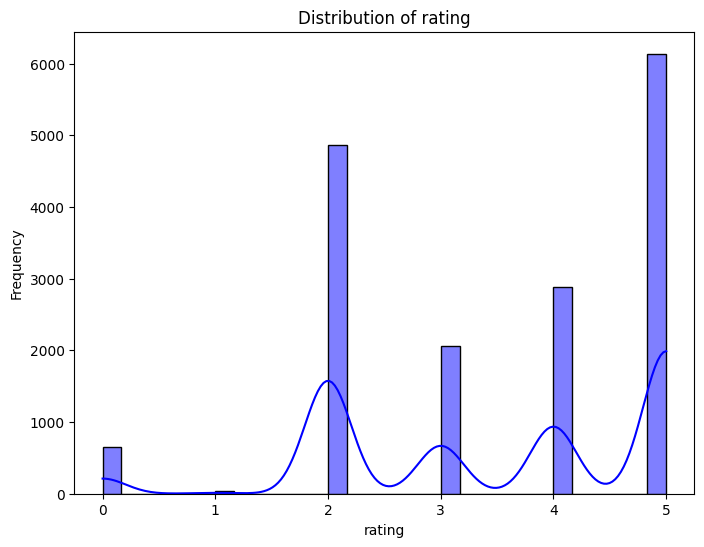

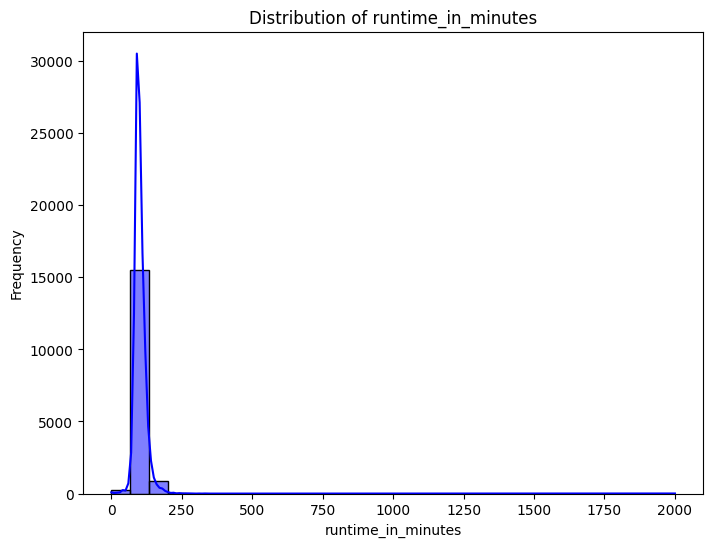

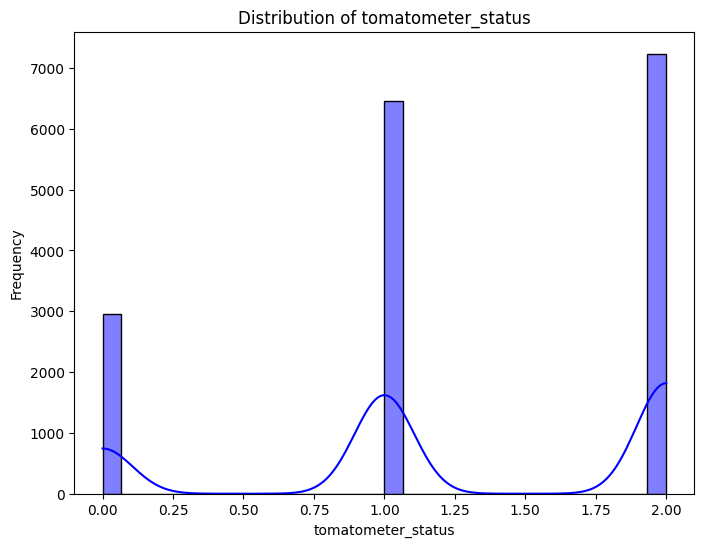

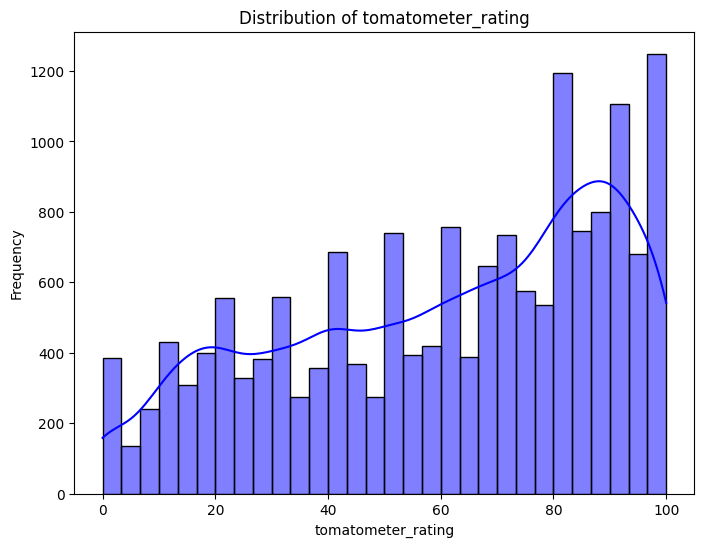

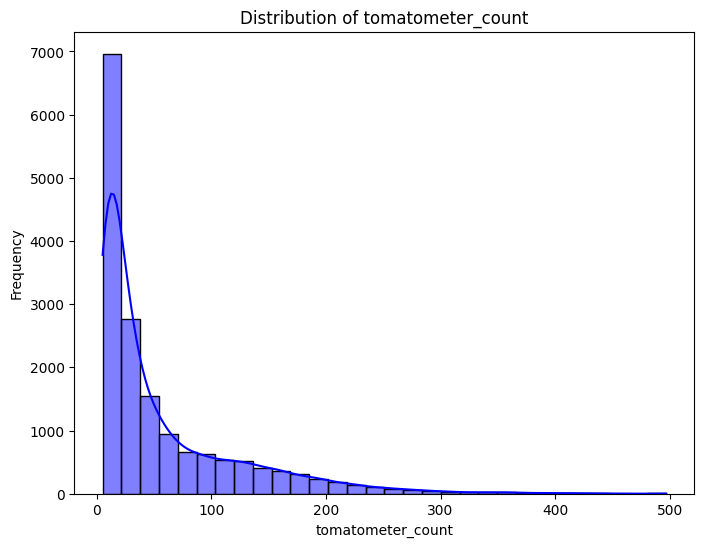

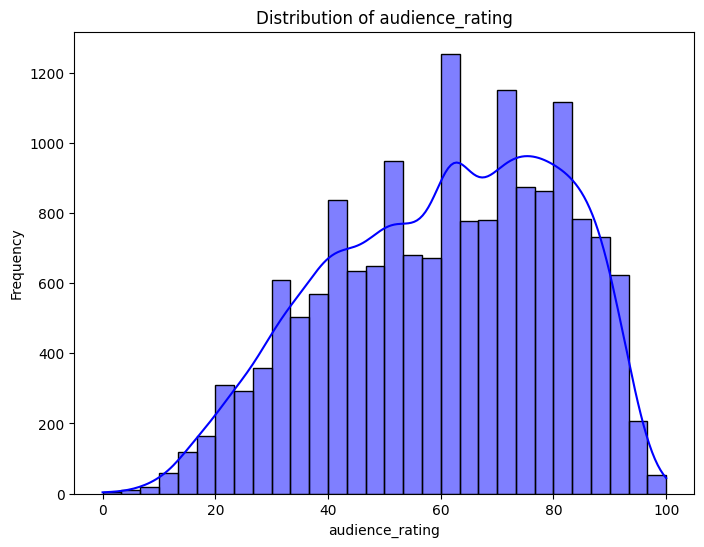

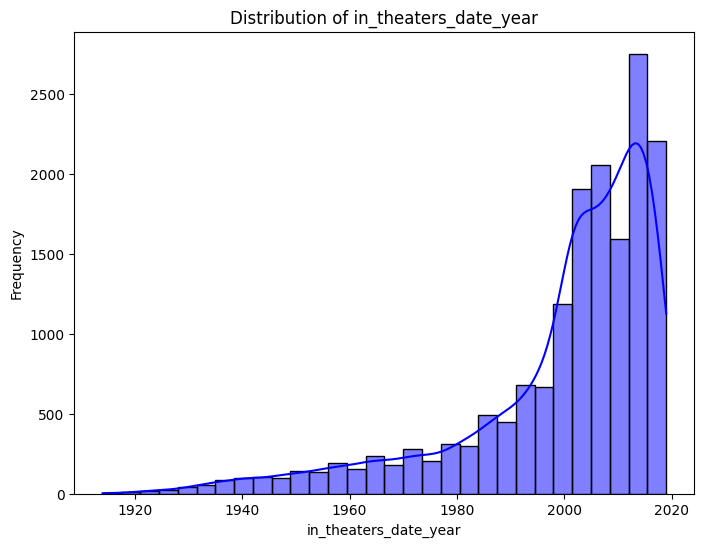

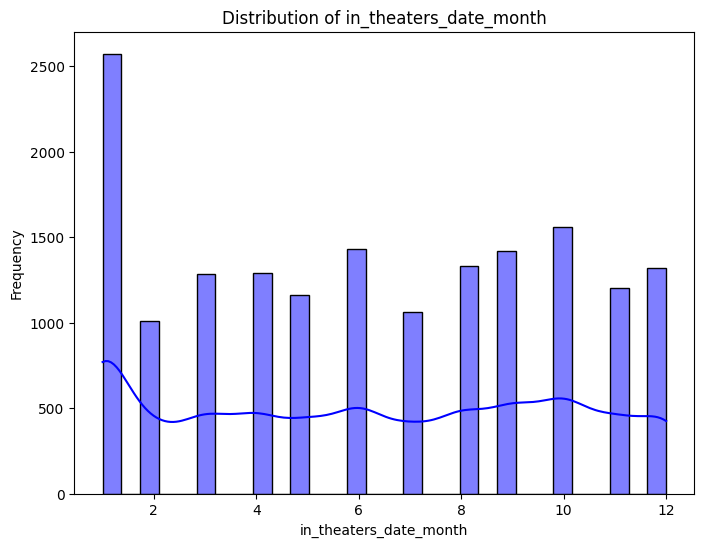

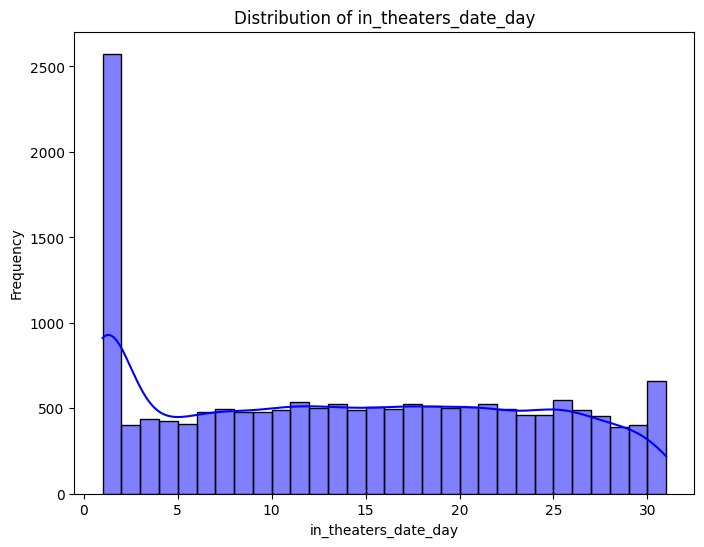

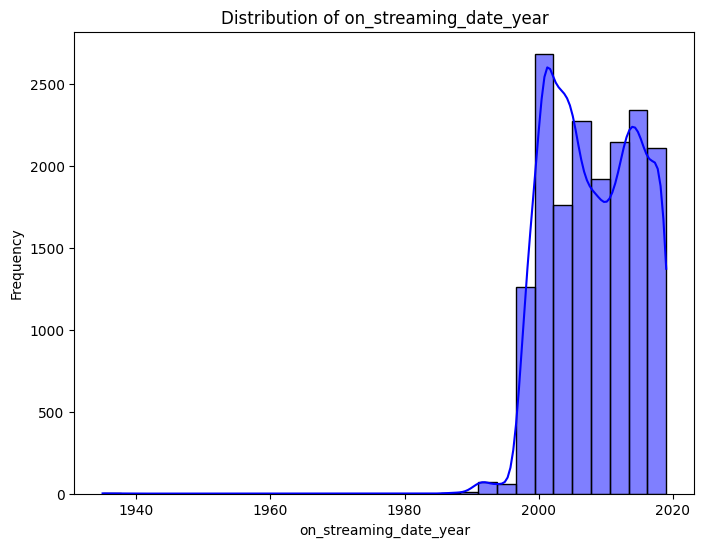

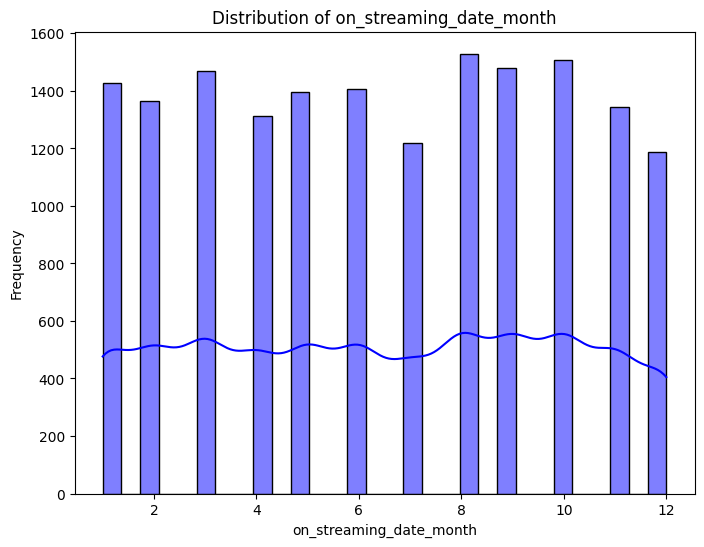

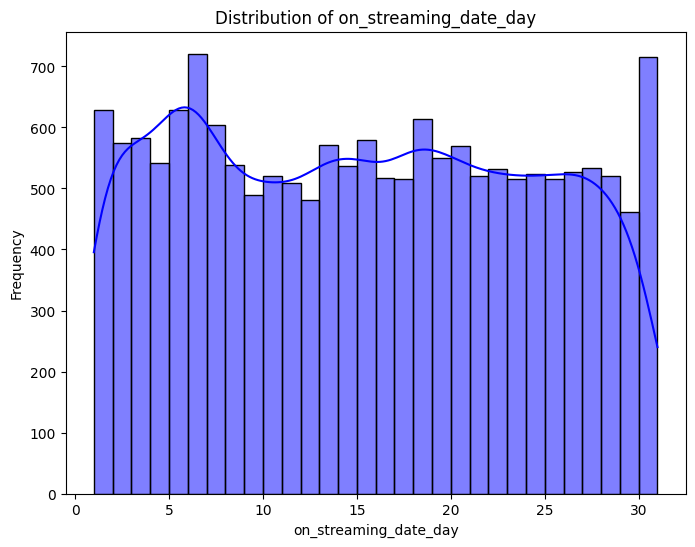

In [21]:
# Select all numeric columns from the dataset
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Loop through each numeric column to visualize its distribution
for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
    sns.histplot(data[col], kde=True, bins=30, color='blue')  # Plot histogram with a KDE overlay
    plt.title(f"Distribution of {col}")  # Add a title dynamically using the column name
    plt.xlabel(col)  # Label the x-axis with the column name
    plt.ylabel("Frequency")  # Label the y-axis
    plt.show()  # Display the plot


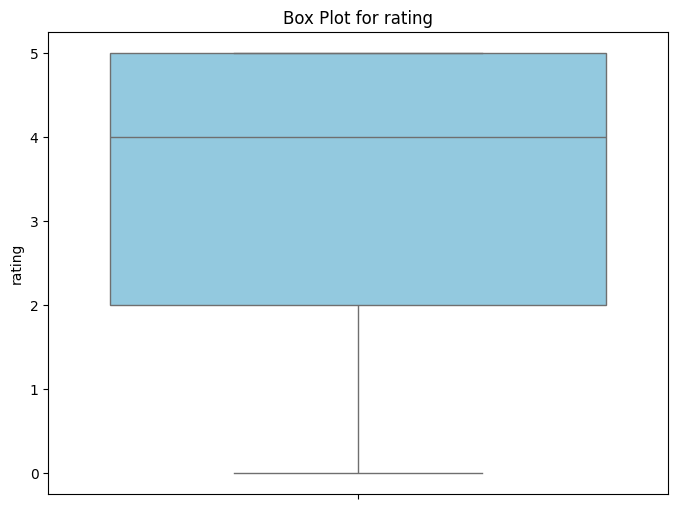

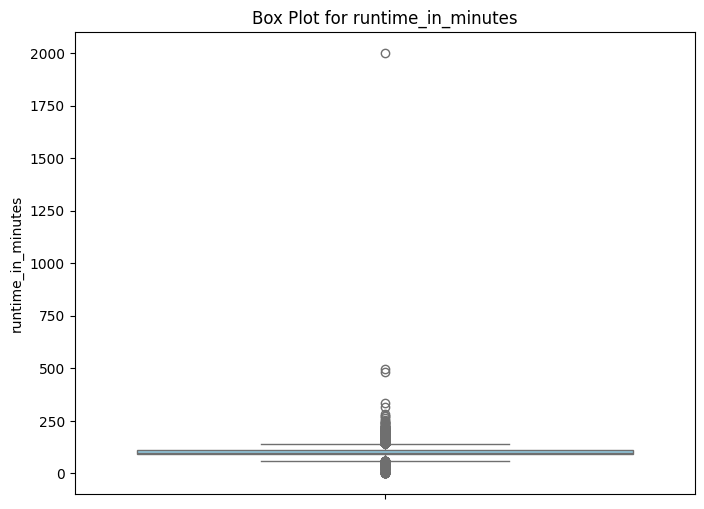

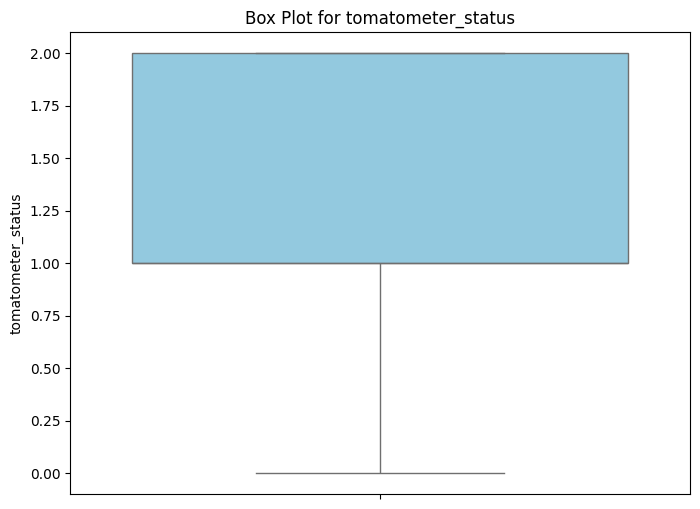

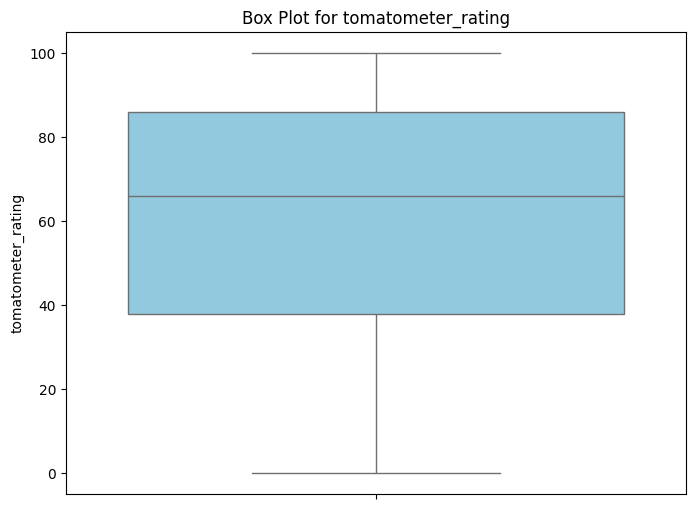

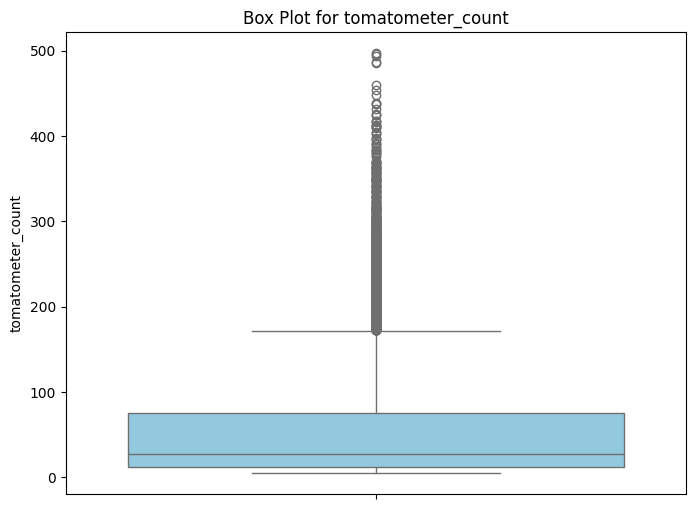

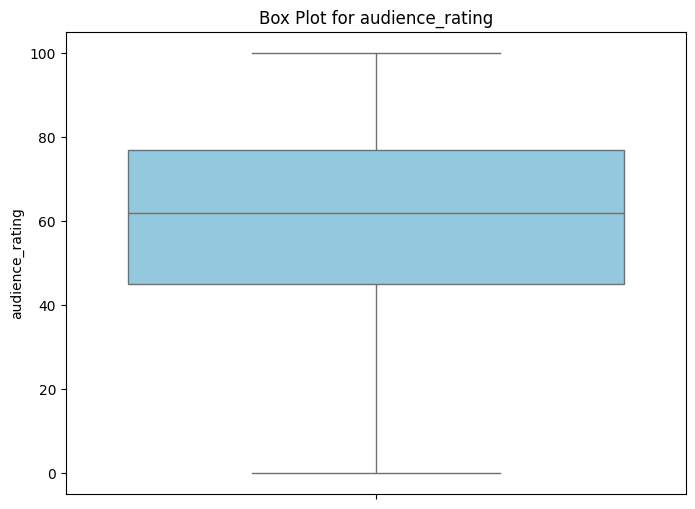

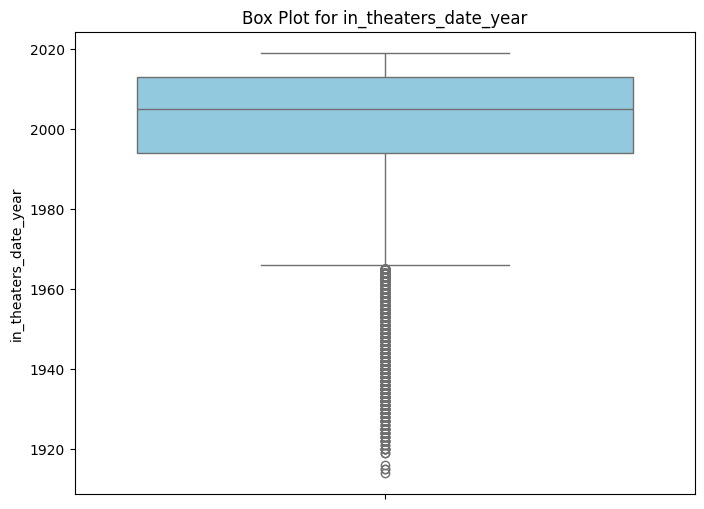

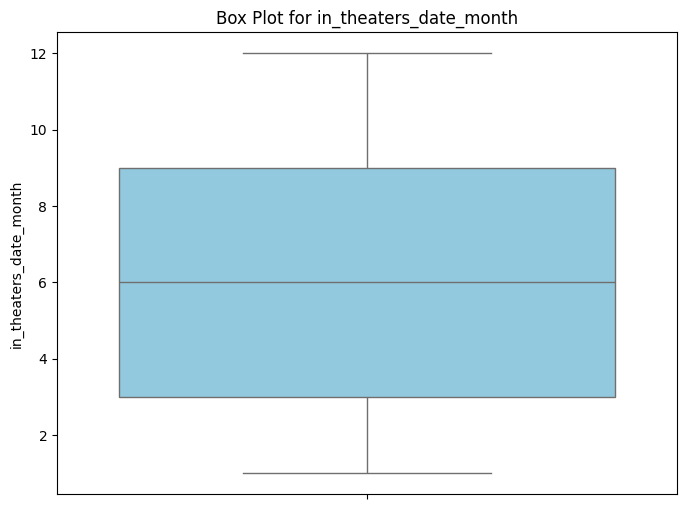

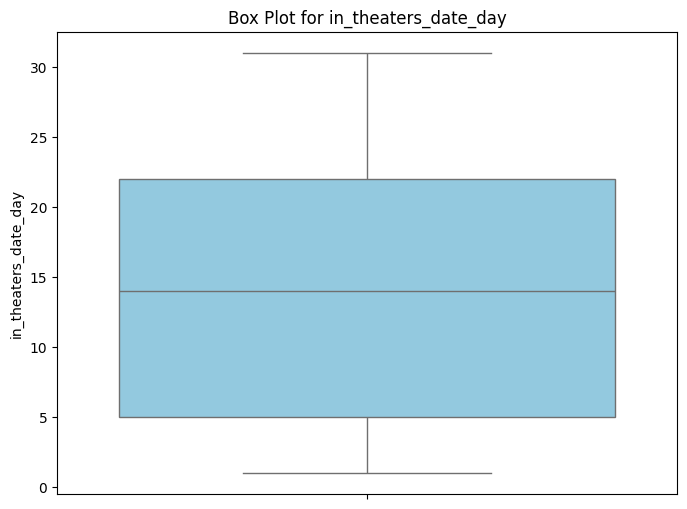

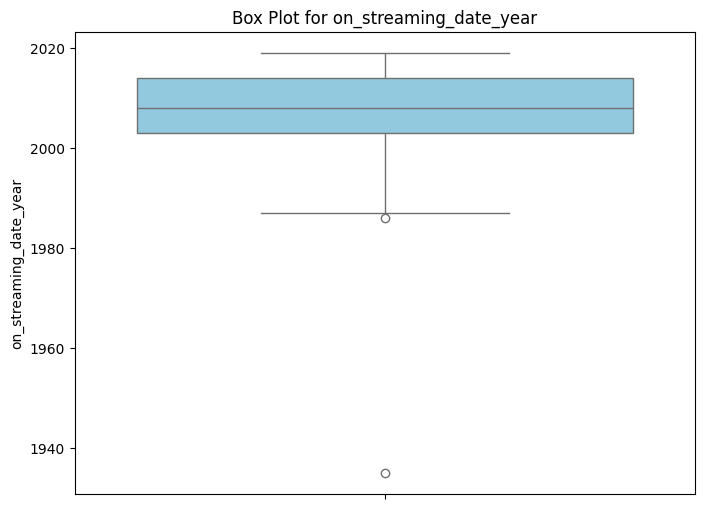

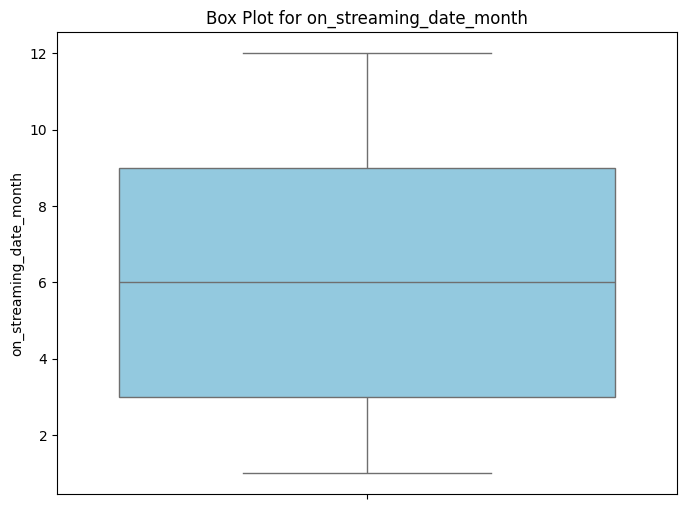

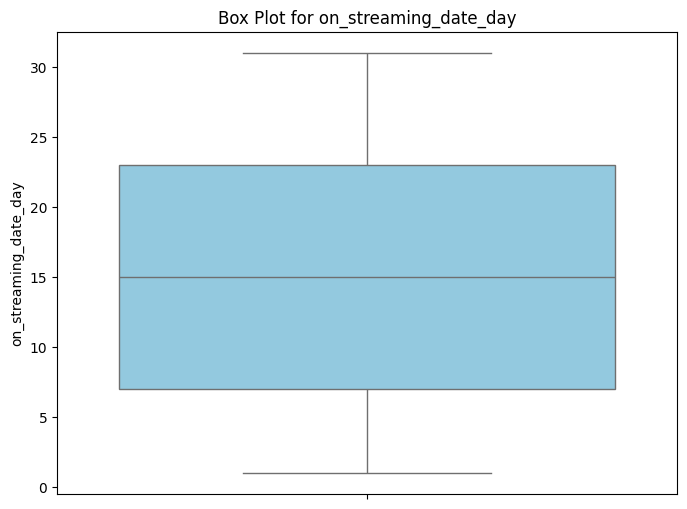

In [22]:
# Loop through each numeric column to visualize its distribution using boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
    sns.boxplot(y=data[col], color='skyblue')  # Create a box plot for the current column
    plt.title(f"Box Plot for {col}")  # Add a title dynamically using the column name
    plt.ylabel(col)  # Label the y-axis with the column name
    plt.show()  # Display the plot


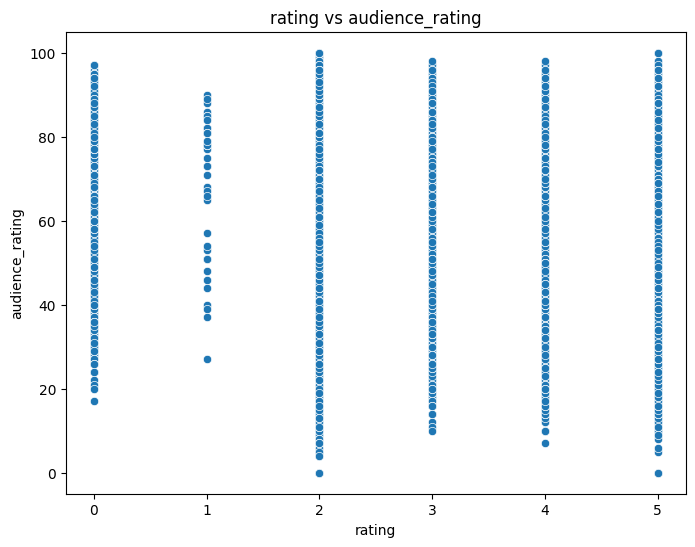

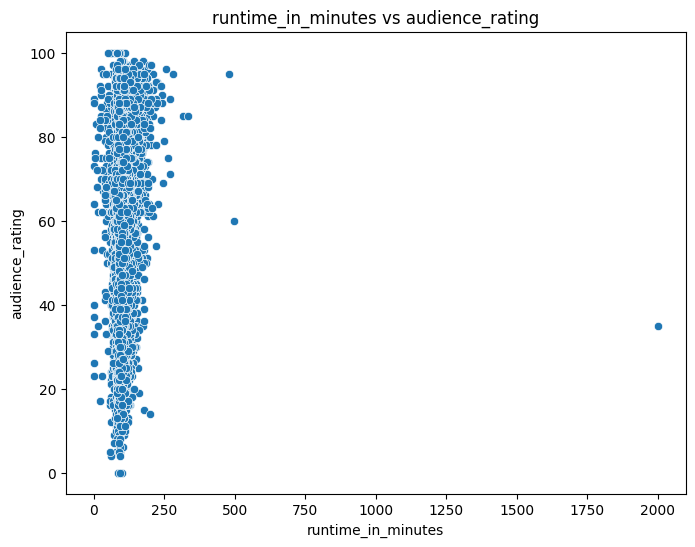

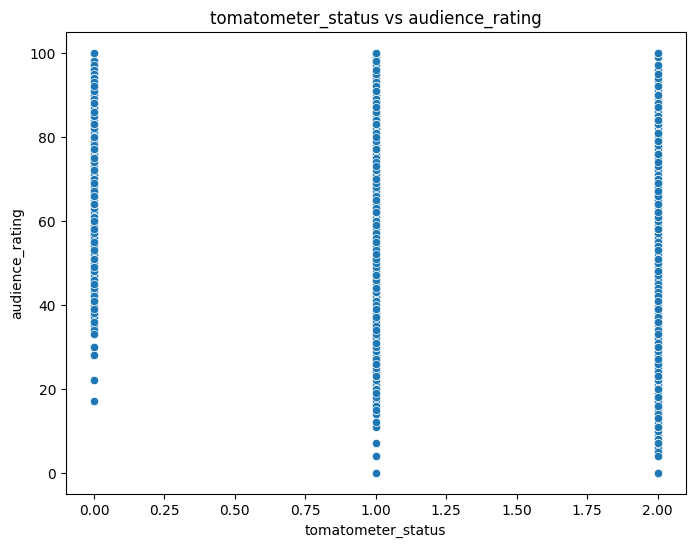

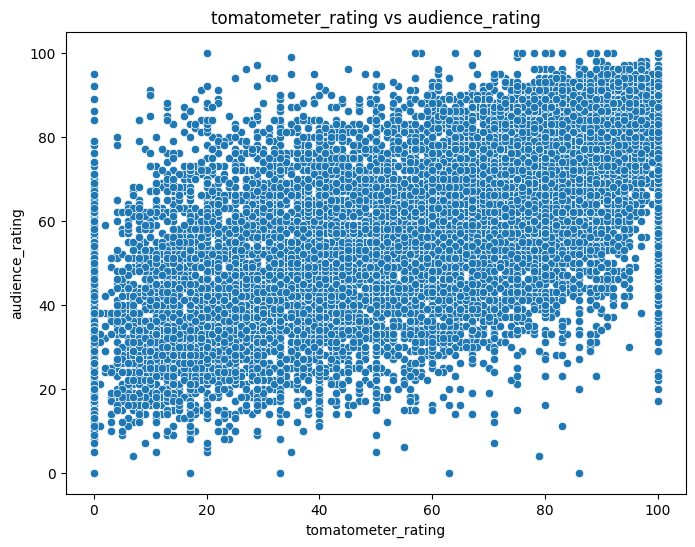

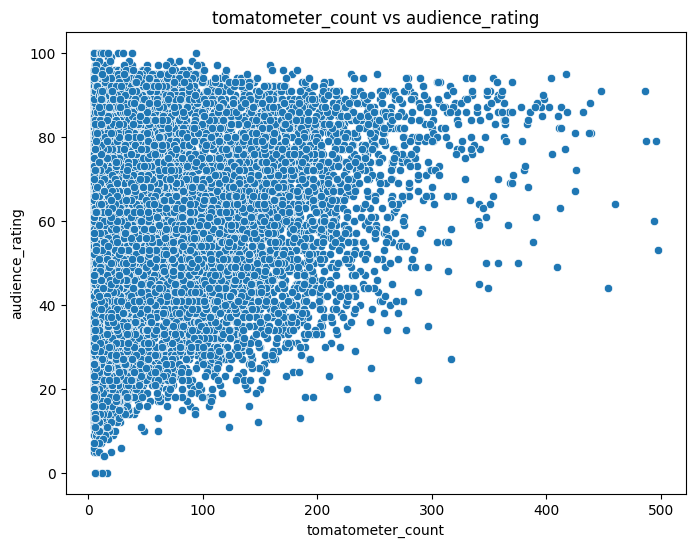

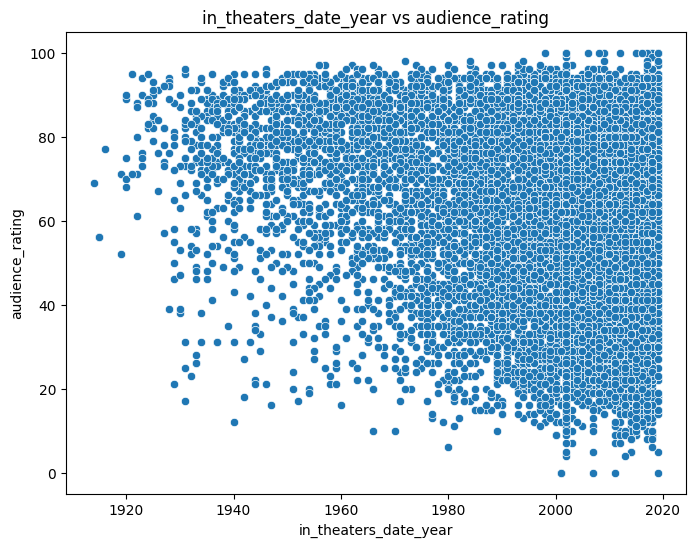

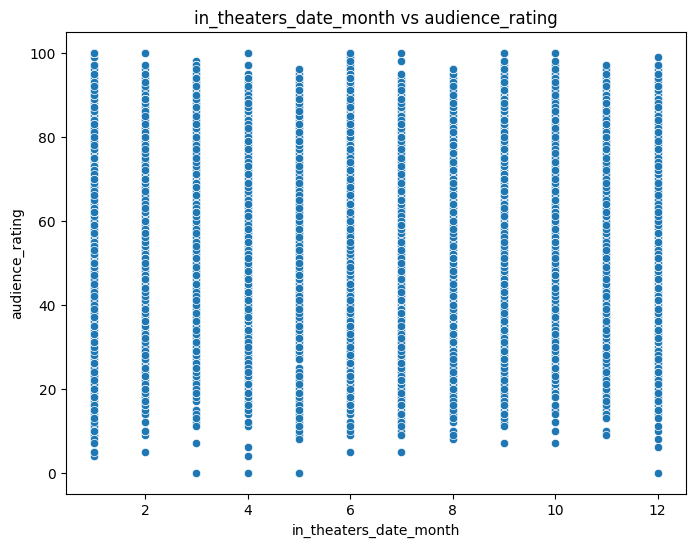

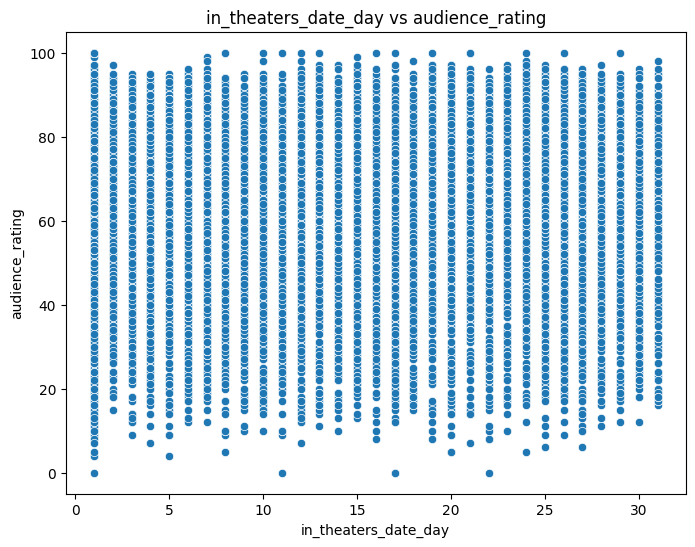

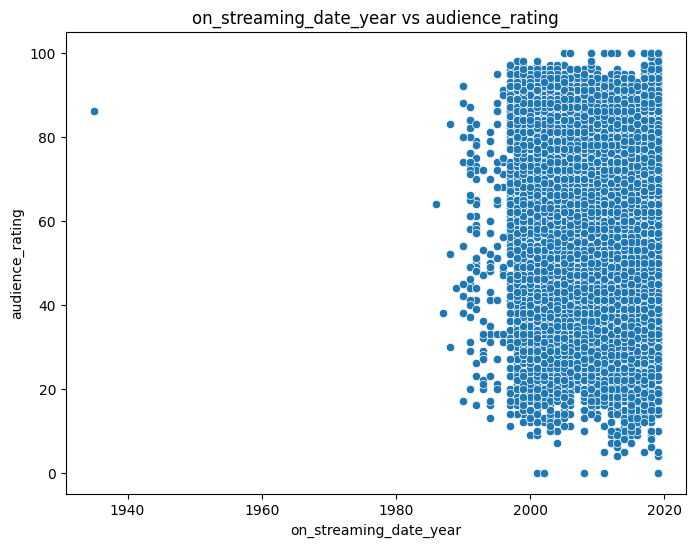

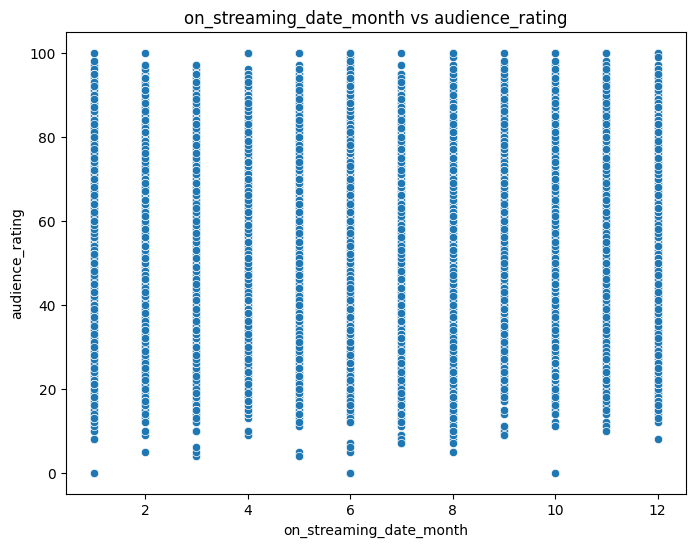

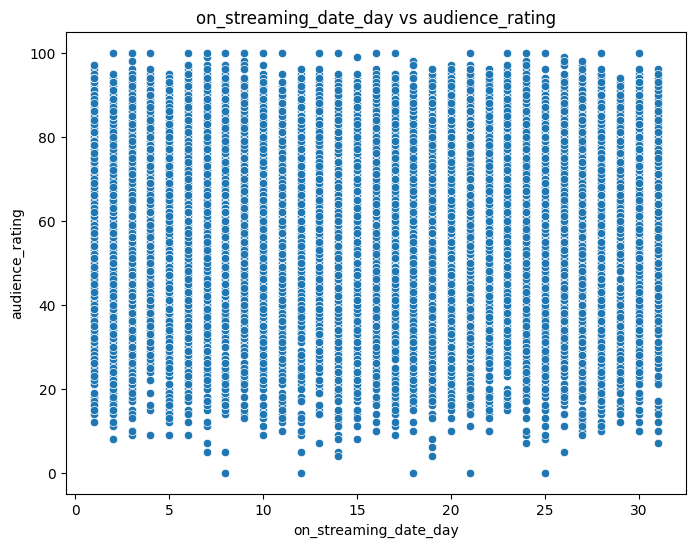

In [23]:
# Define the target column
target_col = 'audience_rating'  # Assuming 'audience_rating' is the target variable

# Loop through all numeric columns except the target column
for col in numeric_cols:
    if col != target_col:  # Exclude the target column from the loop
        plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
        sns.scatterplot(x=data[col], y=data[target_col])  # Create a scatter plot
        plt.title(f"{col} vs {target_col}")  # Add a title dynamically showing the relationship
        plt.xlabel(col)  # Label the x-axis with the feature column name
        plt.ylabel(target_col)  # Label the y-axis with the target column name
        plt.show()  # Display the plot


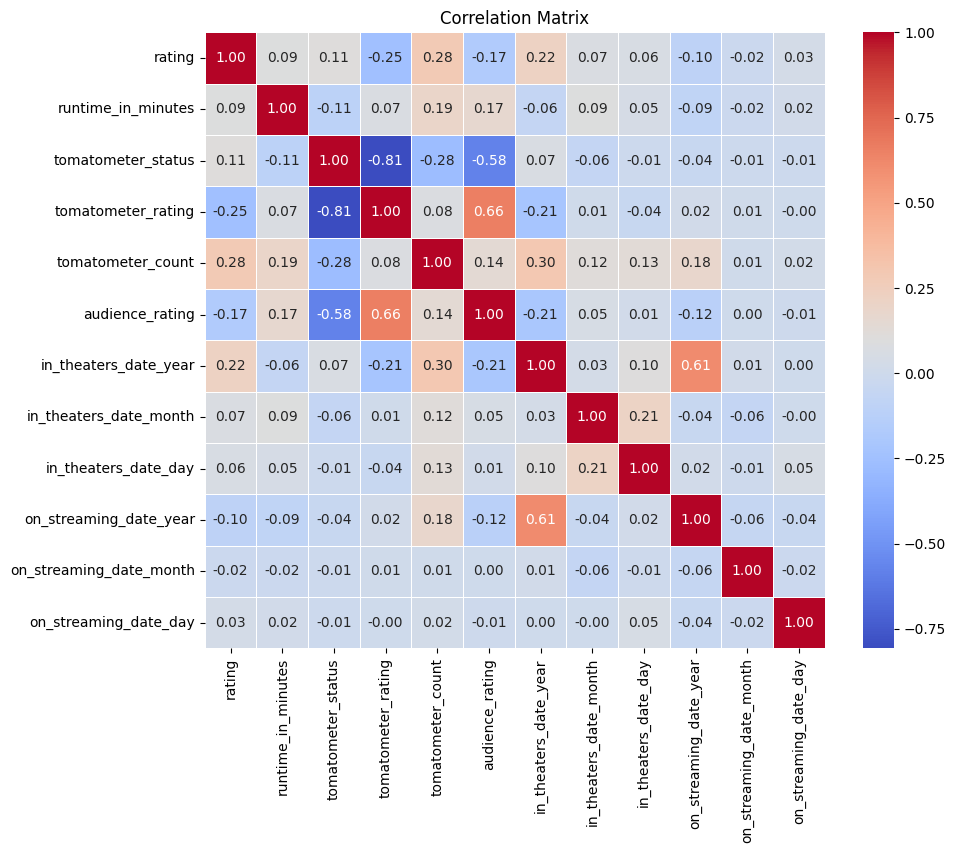

In [24]:
# Set the figure size for the correlation matrix heatmap
plt.figure(figsize=(10, 8))

# Compute the correlation matrix for numeric columns
corr_matrix = data[numeric_cols].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title to the heatmap
plt.title("Correlation Matrix")

# Display the heatmap
plt.show()


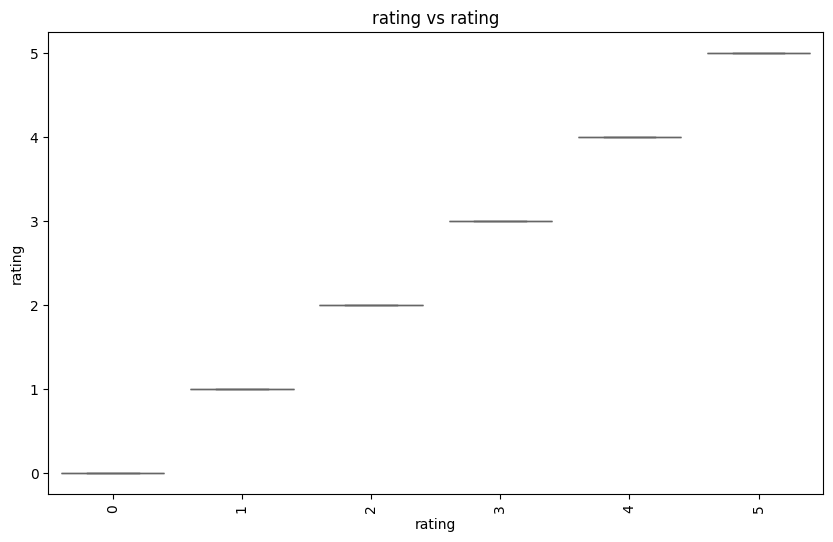

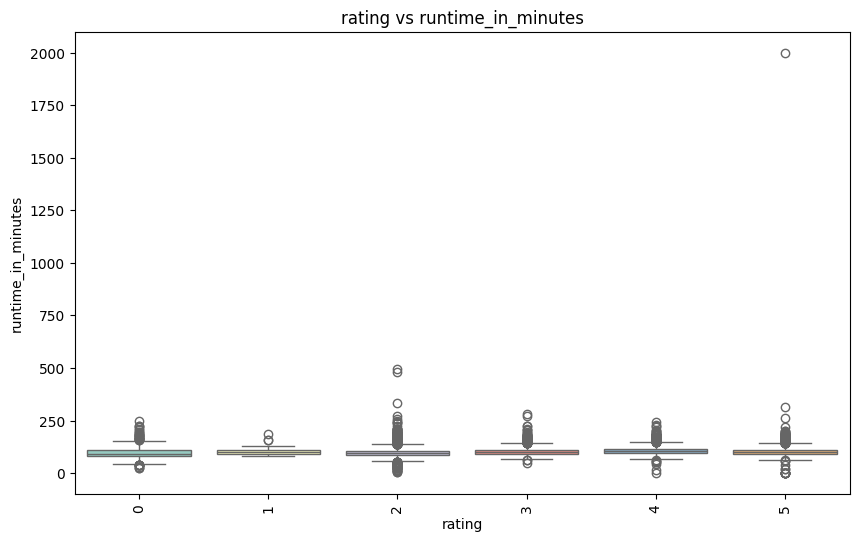

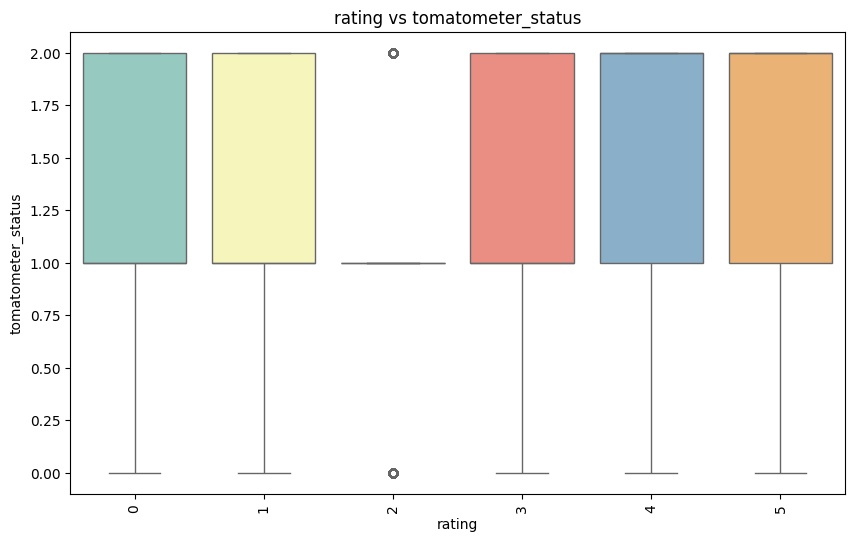

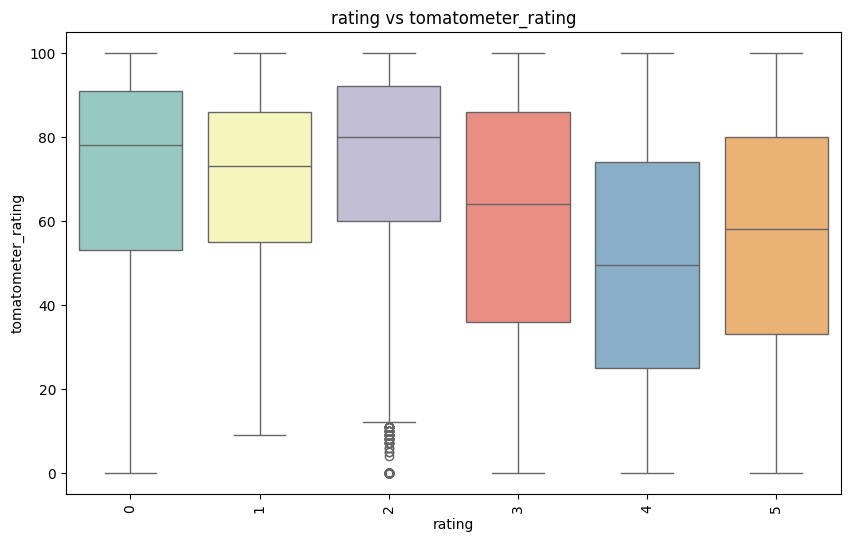

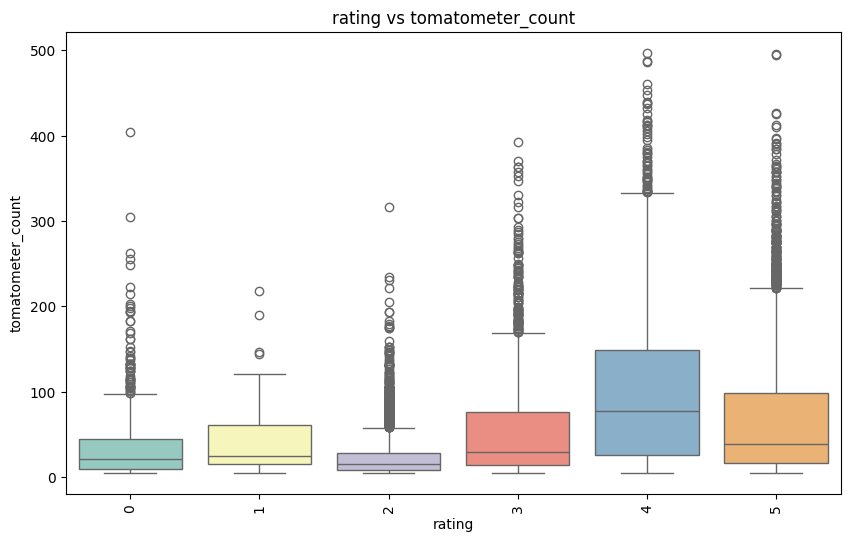

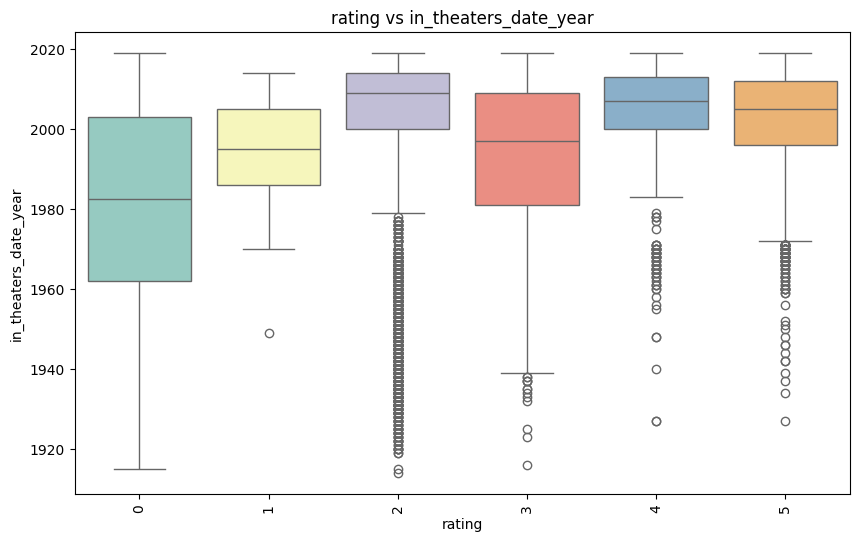

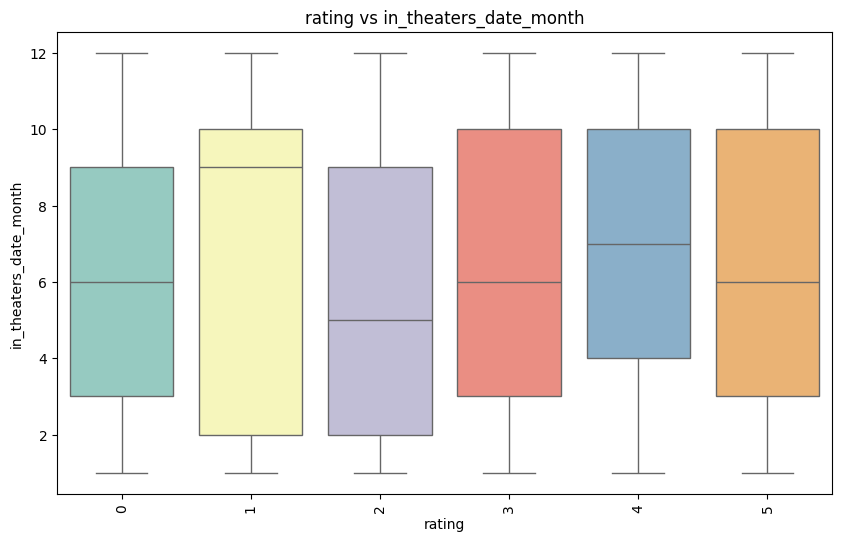

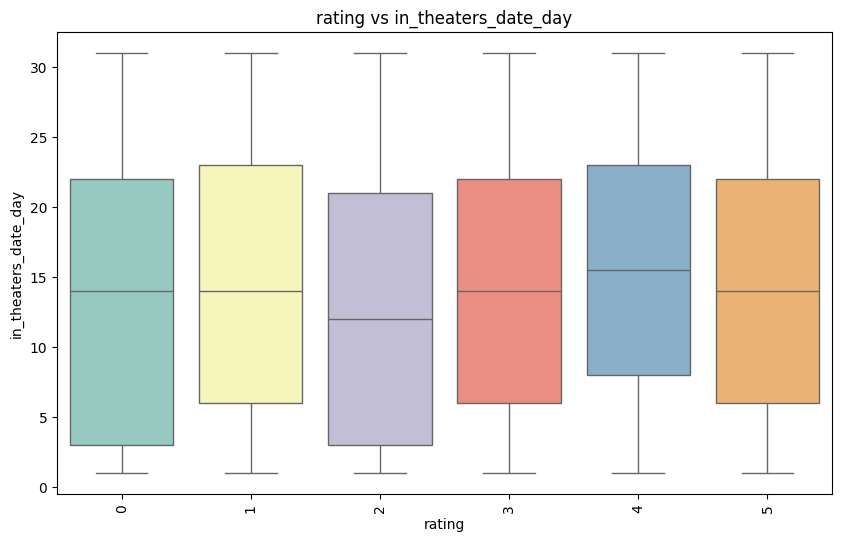

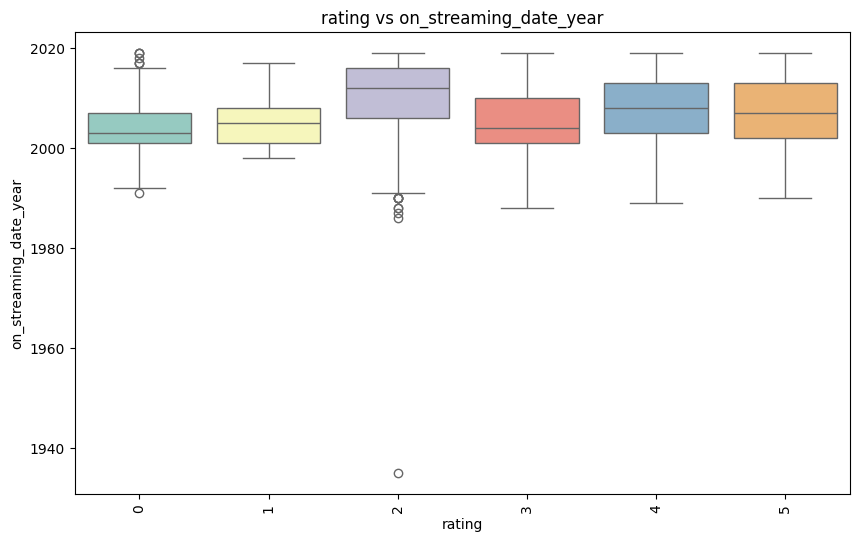

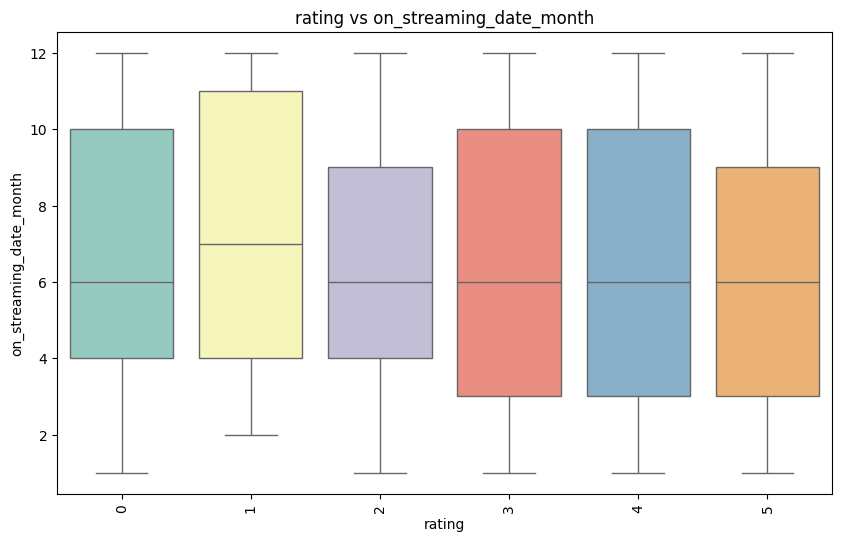

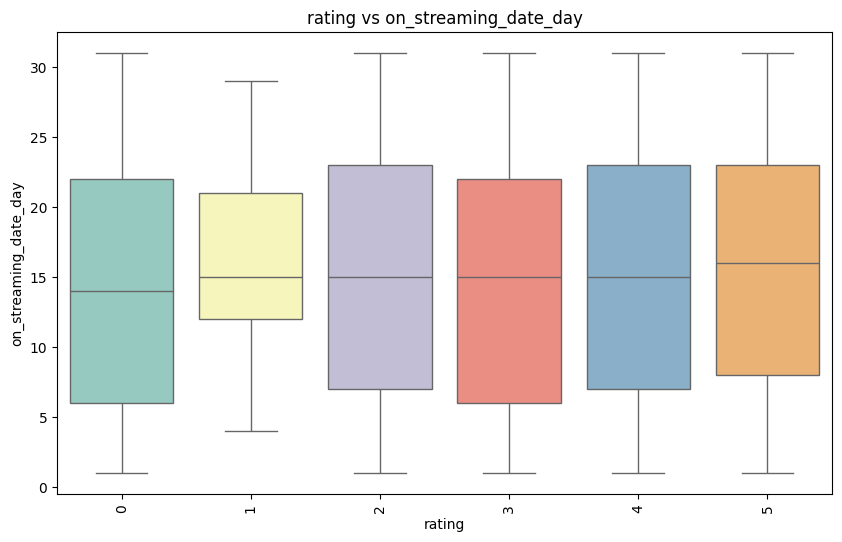

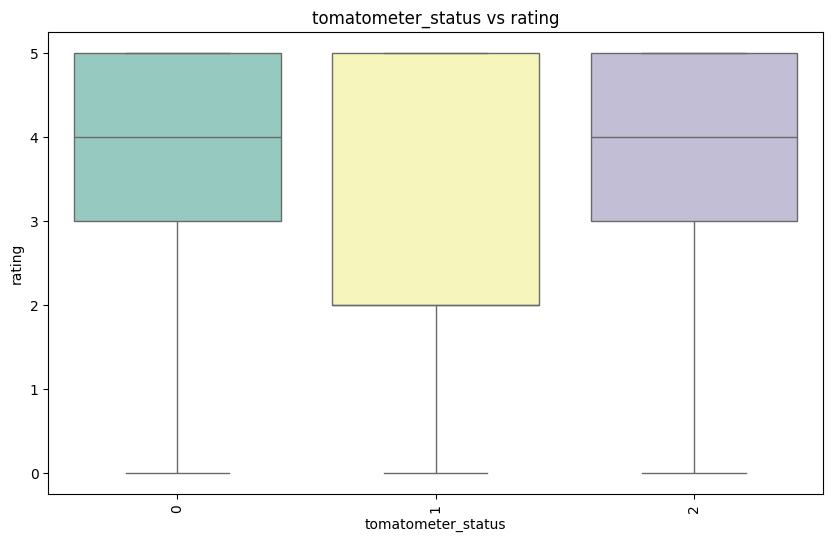

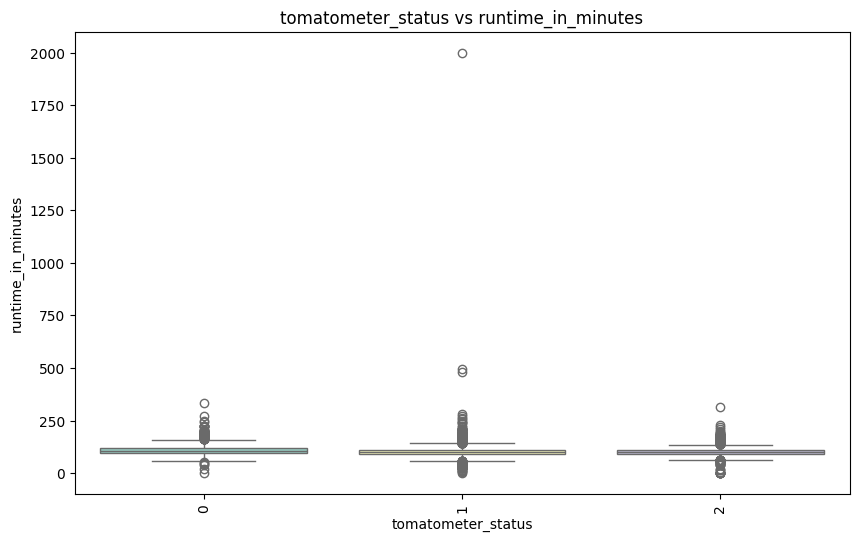

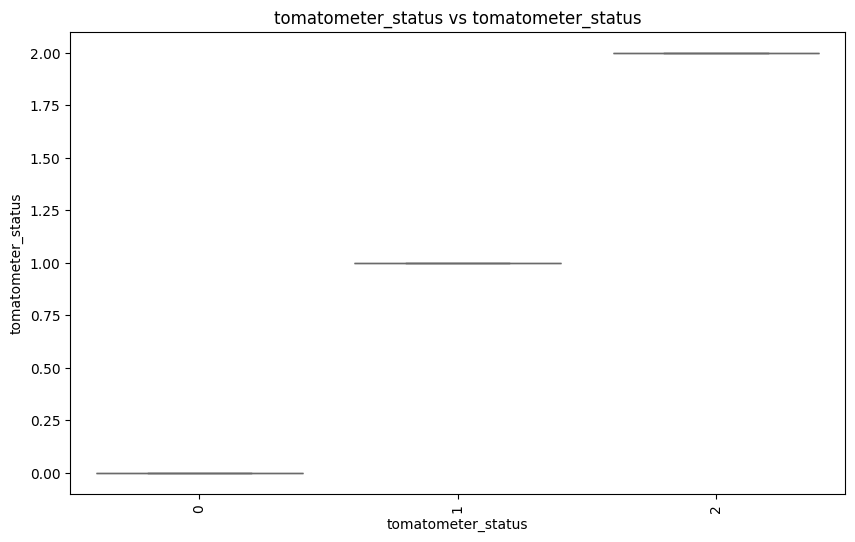

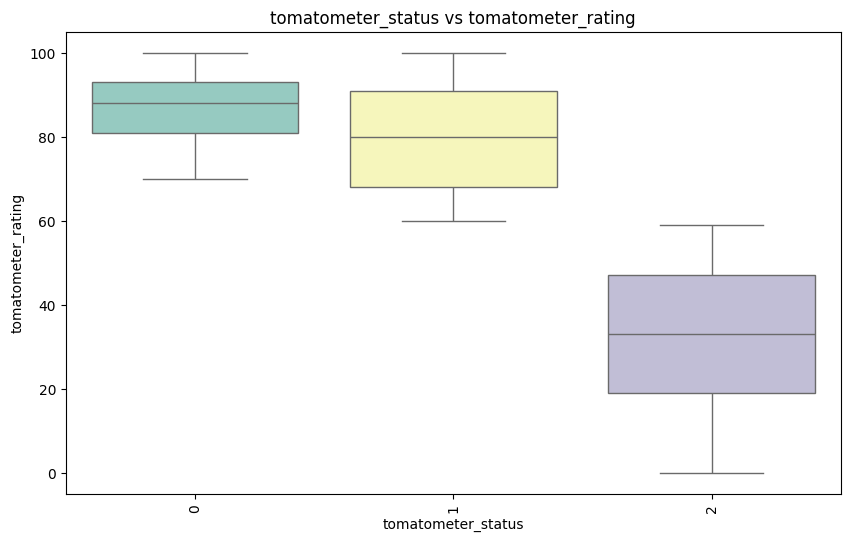

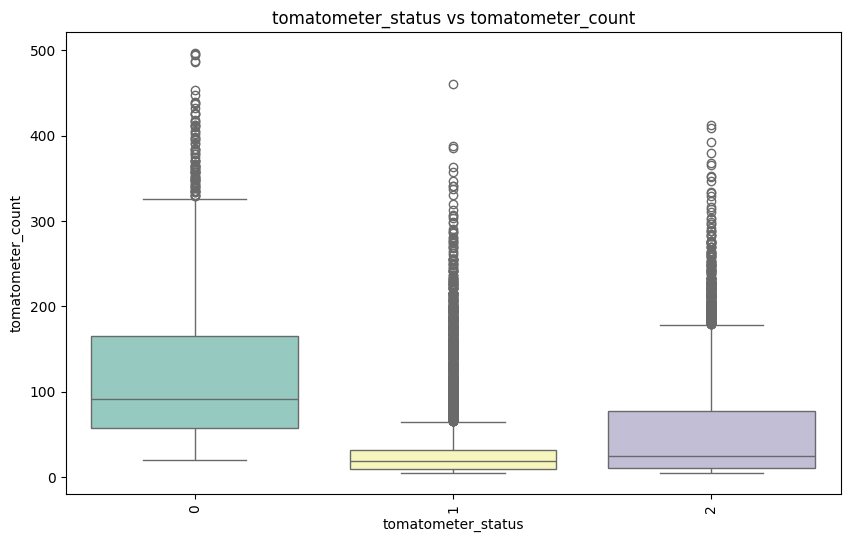

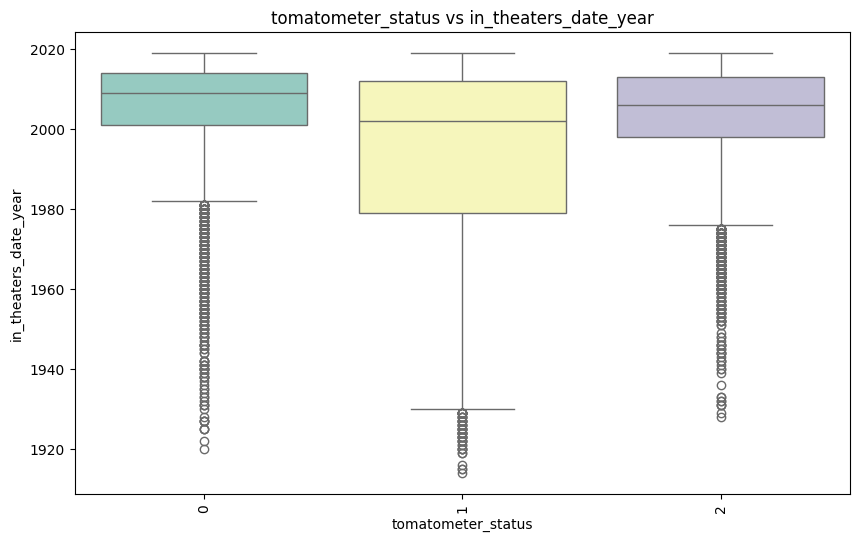

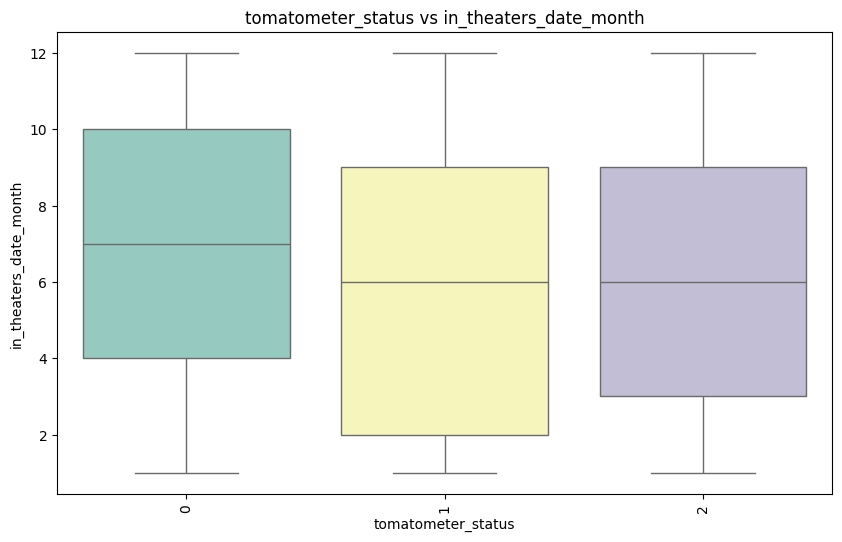

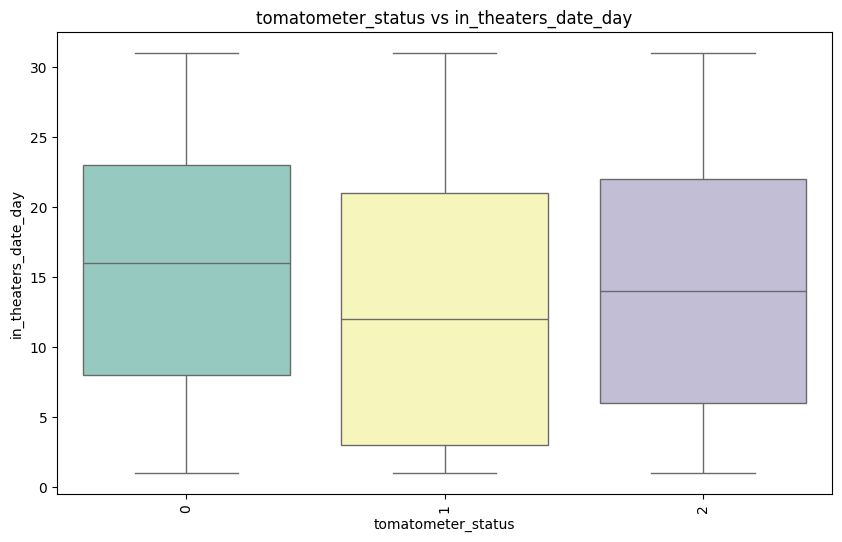

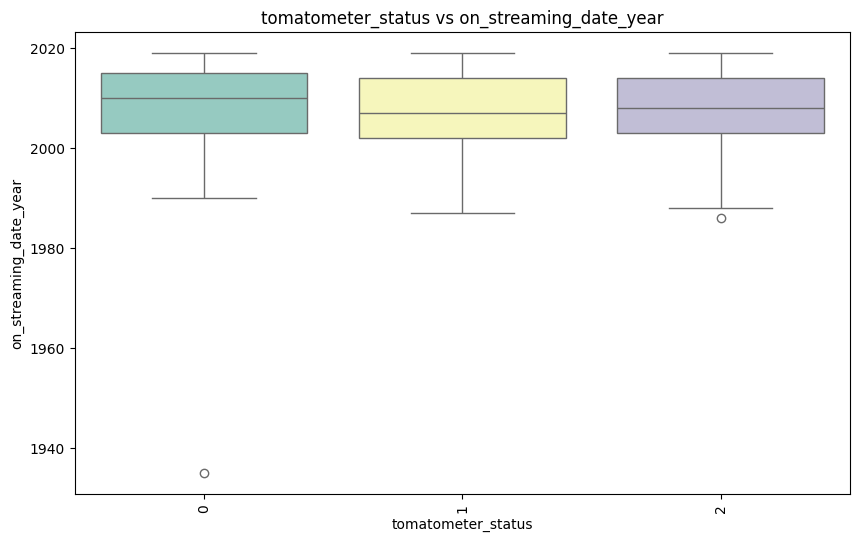

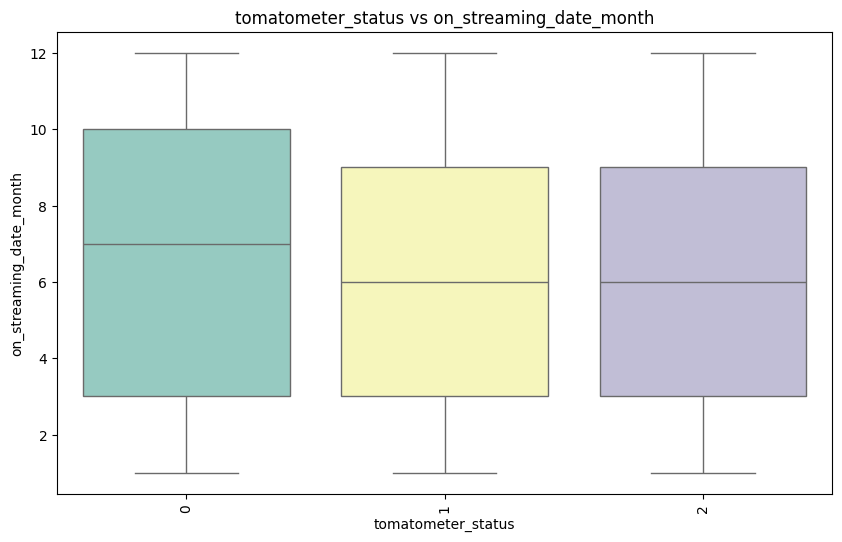

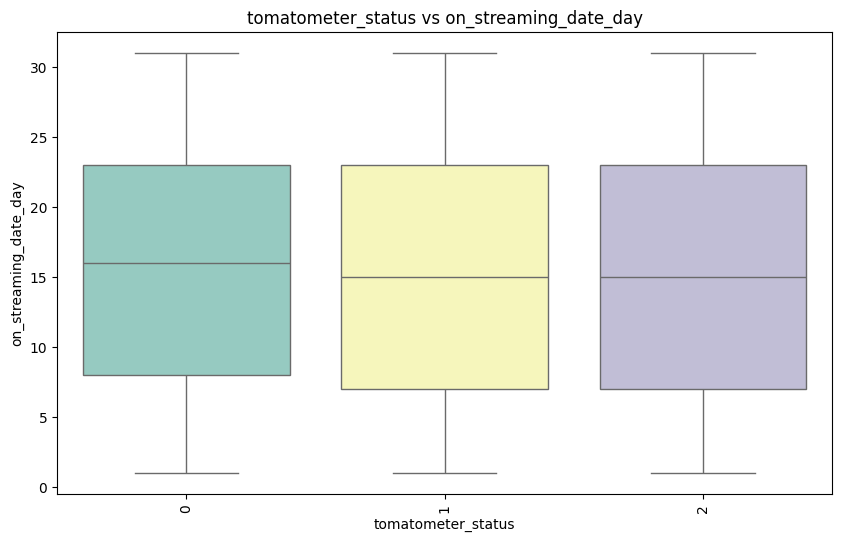

In [25]:
# Define the categorical columns and iterate through them
categorical_cols = ['rating', 'tomatometer_status']

# Loop through each categorical column
for cat_col in categorical_cols:
    # Loop through each numeric column except the target variable
    for num_col in numeric_cols:
        if num_col != 'audience_rating':  # Exclude the target variable from the loop
            plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
            sns.boxplot(x=data[cat_col], y=data[num_col], palette="Set3")  # Create a box plot
            plt.title(f"{cat_col} vs {num_col}")  # Add a title dynamically showing the relationship
            plt.xlabel(cat_col)  # Label the x-axis with the categorical column name
            plt.ylabel(num_col)  # Label the y-axis with the numeric column name
            plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
            plt.show()  # Display the plot


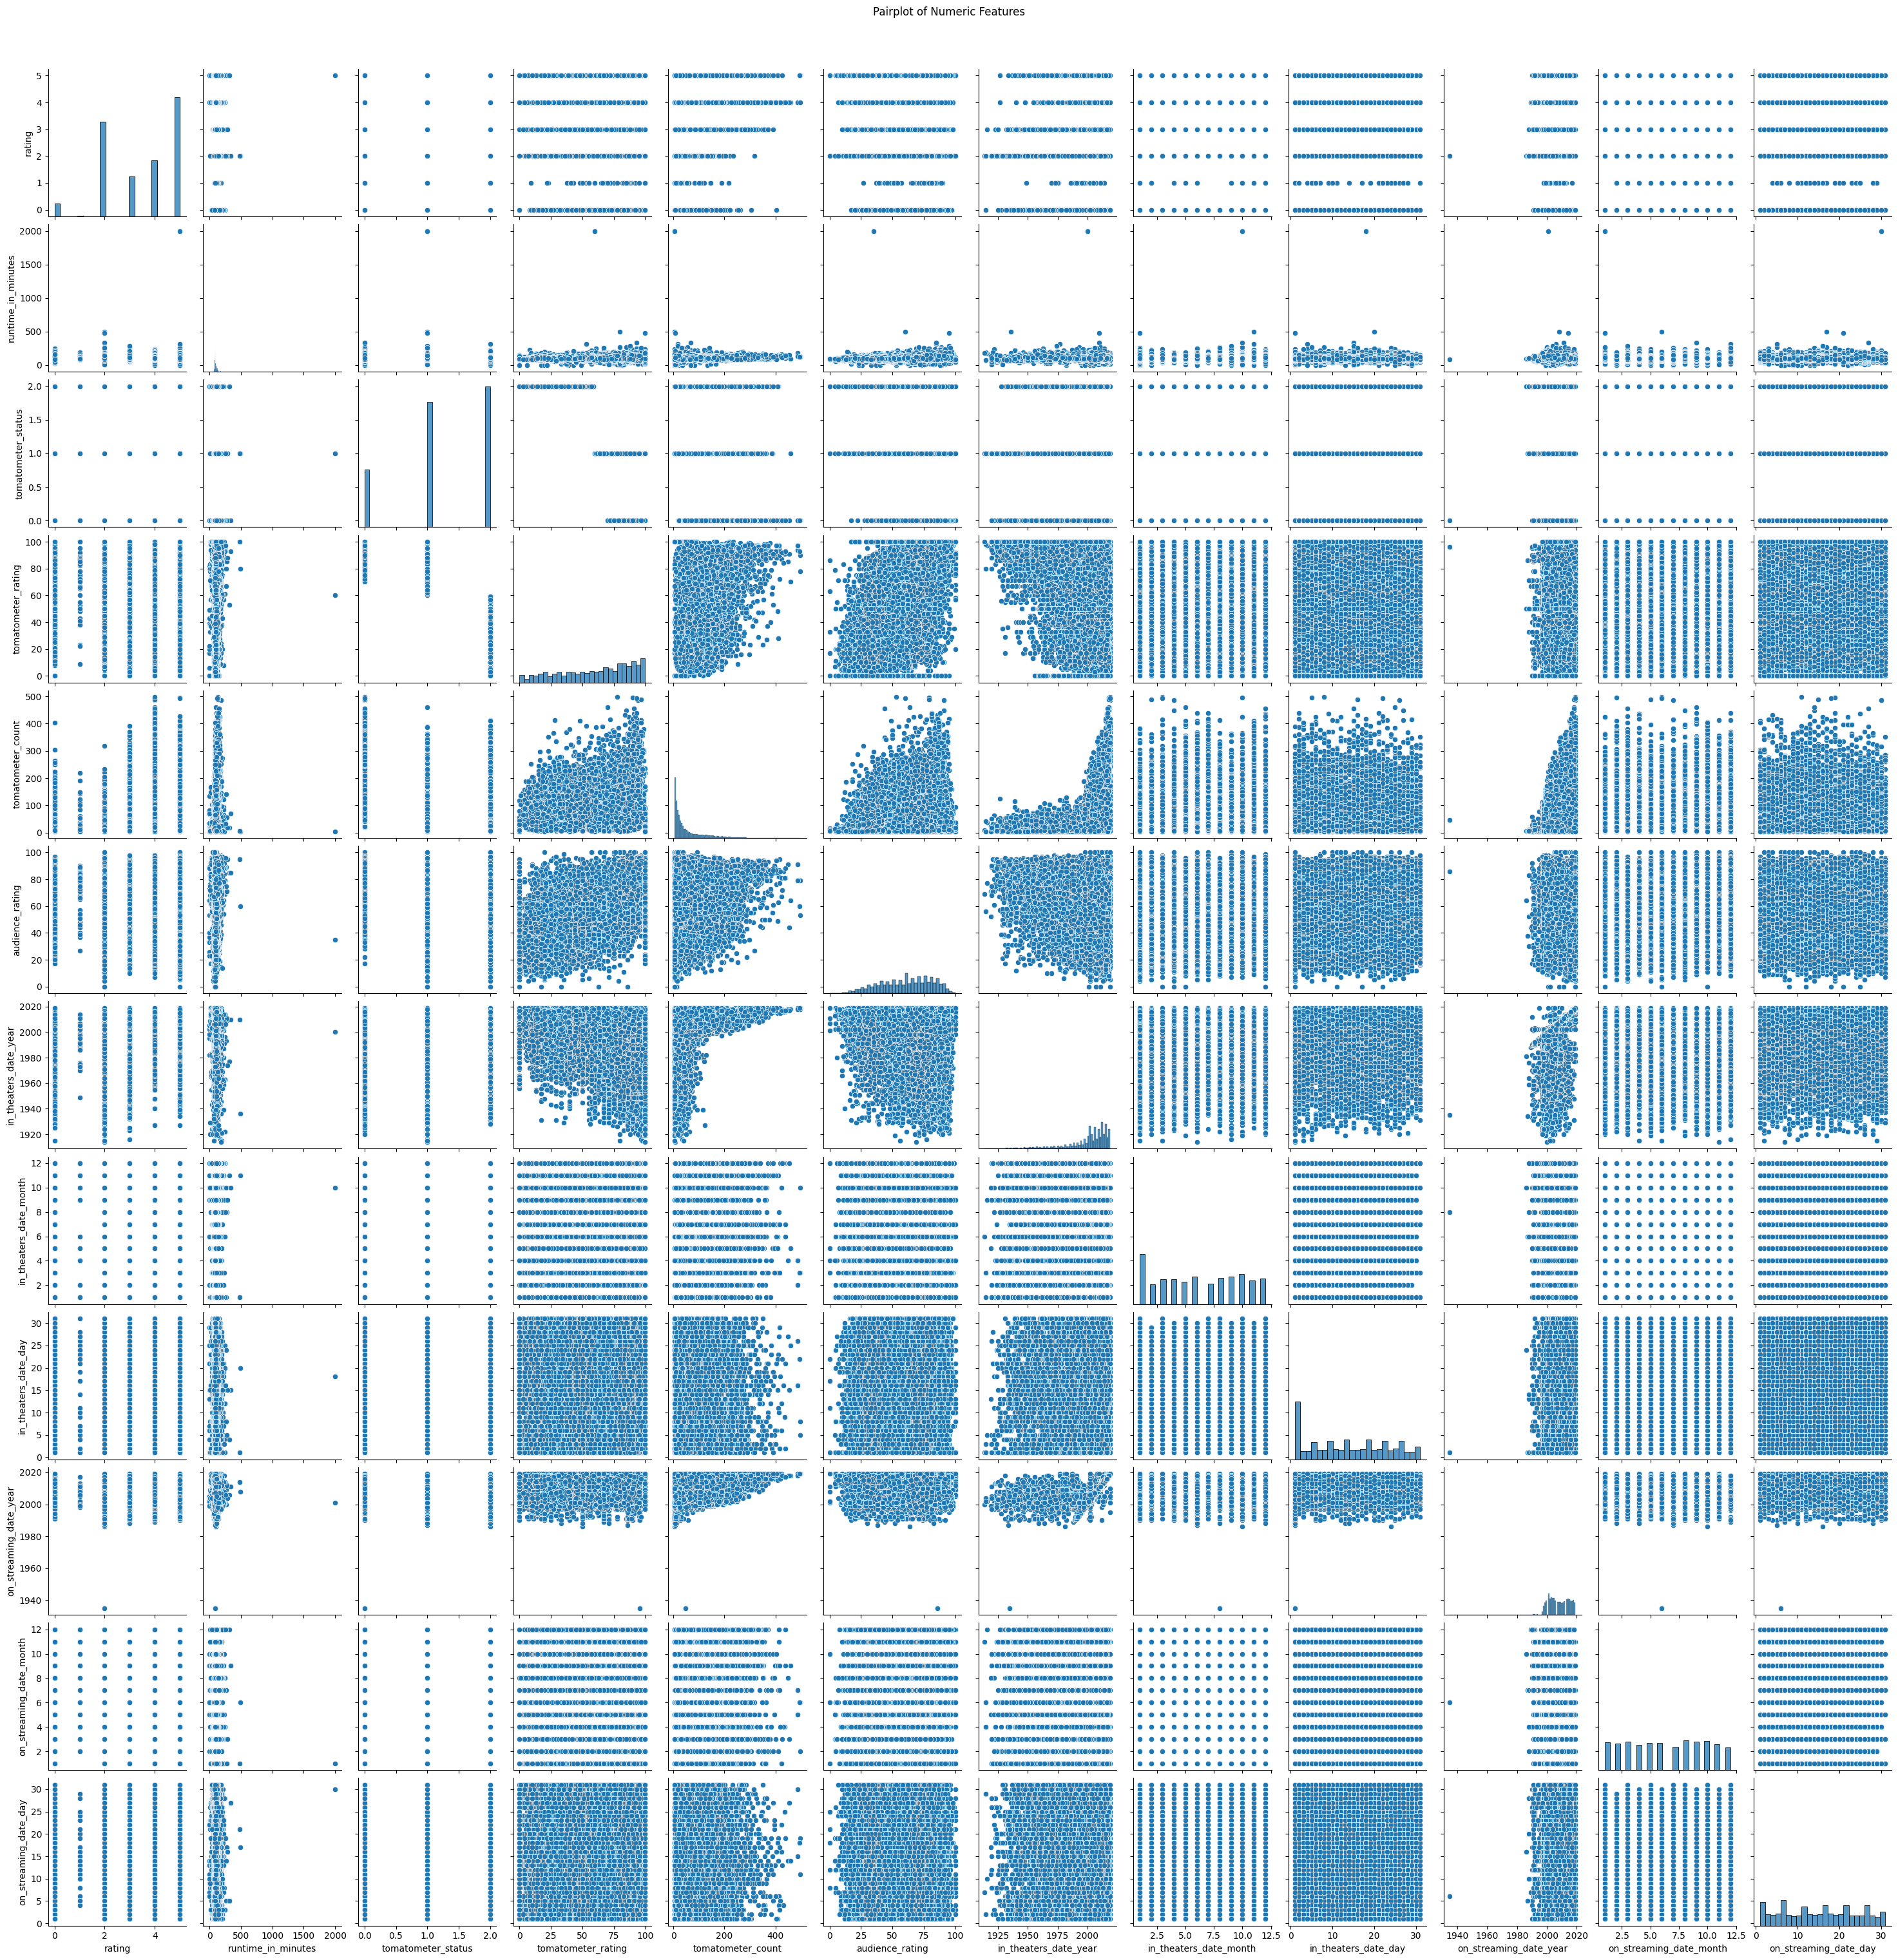

In [26]:
# Create a pairplot to visualize pairwise relationships between numeric features
sns.pairplot(data[numeric_cols])

# Add a title above the plot
plt.suptitle("Pairplot of Numeric Features", y=1.02)

# Display the pairplot
plt.show()


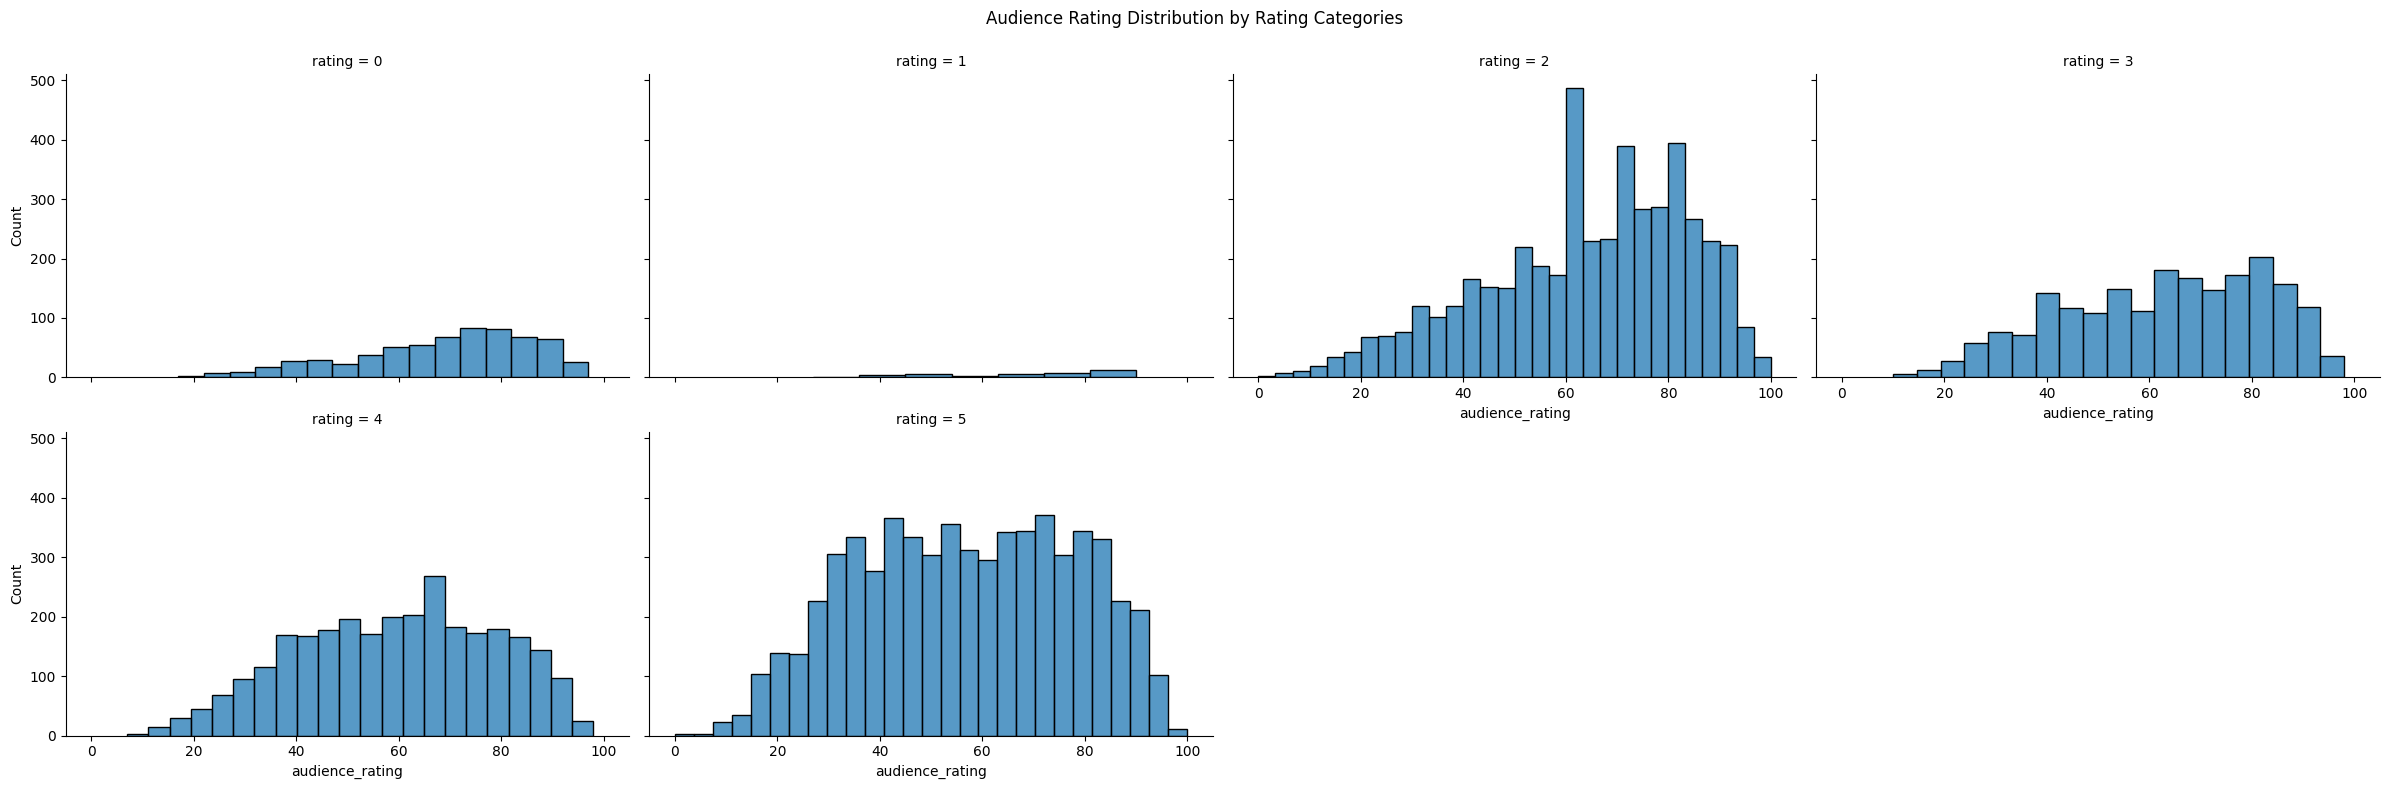

In [27]:
# Create a FacetGrid to visualize the distribution of audience ratings by rating categories
g = sns.FacetGrid(data, col='rating', col_wrap=4, height=4, aspect=1.5)

# Map a histogram plot of 'audience_rating' to each facet
g.map(sns.histplot, "audience_rating")

# Adjust spacing at the top of the grid for the title
g.fig.subplots_adjust(top=0.9)

# Add a title for the entire grid
g.fig.suptitle("Audience Rating Distribution by Rating Categories")

# Display the FacetGrid
plt.show()


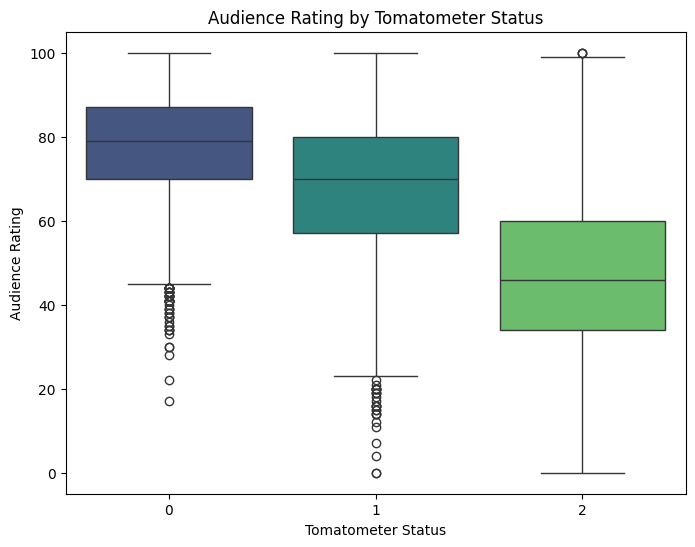

In [28]:
# Set the figure size for better visibility
plt.figure(figsize=(8, 6))

# Create a boxplot to visualize the relationship between 'tomatometer_status' and 'audience_rating'
sns.boxplot(x=data['tomatometer_status'], y=data['audience_rating'], palette="viridis")

# Add a title to the plot
plt.title("Audience Rating by Tomatometer Status")

# Label the x-axis
plt.xlabel("Tomatometer Status")

# Label the y-axis
plt.ylabel("Audience Rating")

# Display the plot
plt.show()


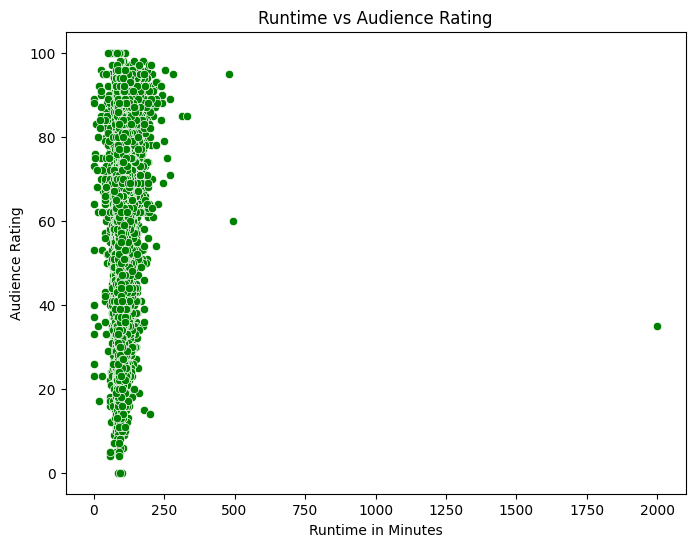

In [29]:
# Set the figure size for better visibility
plt.figure(figsize=(8, 6))

# Create a scatterplot to visualize the relationship between 'runtime_in_minutes' and 'audience_rating'
sns.scatterplot(x=data['runtime_in_minutes'], y=data['audience_rating'], color='green')

# Add a title to the scatterplot
plt.title("Runtime vs Audience Rating")

# Label the x-axis with the feature name
plt.xlabel("Runtime in Minutes")

# Label the y-axis with the target variable
plt.ylabel("Audience Rating")

# Display the scatterplot
plt.show()


In [30]:
# Calculate the 25th percentile (Q1) of the 'runtime_in_minutes' column
Q1 = data['runtime_in_minutes'].quantile(0.25)

# Calculate the 75th percentile (Q3) of the 'runtime_in_minutes' column
Q3 = data['runtime_in_minutes'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower bound for outlier detection
lower_bound = Q1 - 1.5 * IQR

# Define the upper bound for outlier detection
upper_bound = Q3 + 1.5 * IQR

# Filter the data to include only rows within the bounds (remove outliers)
data = data[(data['runtime_in_minutes'] >= lower_bound) & (data['runtime_in_minutes'] <= upper_bound)]


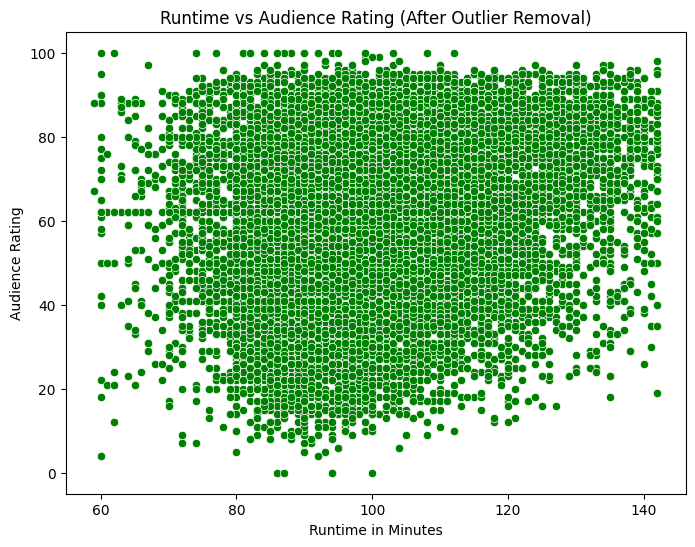

In [31]:
# After Removing outlayers
plt.figure(figsize=(8, 6))

# Create a scatterplot to visualize the relationship between 'runtime_in_minutes' and 'audience_rating' after removing outliers
sns.scatterplot(x=data['runtime_in_minutes'], y=data['audience_rating'], color='green')

# Add a title to the scatterplot
plt.title("Runtime vs Audience Rating (After Outlier Removal)")

# Label the x-axis with the feature name
plt.xlabel("Runtime in Minutes")

# Label the y-axis with the target variable
plt.ylabel("Audience Rating")

# Display the scatterplot
plt.show()


In [32]:
data.isnull().sum()

rating                     0
genre                      0
directors                  0
writers                    0
cast                       0
runtime_in_minutes         0
tomatometer_status         0
tomatometer_rating         0
tomatometer_count          0
audience_rating            0
in_theaters_date_year      0
in_theaters_date_month     0
in_theaters_date_day       0
on_streaming_date_year     0
on_streaming_date_month    0
on_streaming_date_day      0
dtype: int64

In [33]:
# Columns to remove
columns_to_drop = [ 
    'in_theaters_date_year', 
    'on_streaming_date_year',
    'on_streaming_date_day',
    'tomatometer_status',
    'rating'  # Drop after encoding
]

# Drop the columns
data = data.drop(columns=columns_to_drop, axis=1)


In [34]:
data.columns

Index(['genre', 'directors', 'writers', 'cast', 'runtime_in_minutes',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'in_theaters_date_month', 'in_theaters_date_day',
       'on_streaming_date_month'],
      dtype='object')

In [35]:
data.head()

genre          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   
3                                    Classics, Drama       Sidney Lumet   
4           Action & Adventure, Drama, Kids & Family  Richard Fleischer   

             writers                                               cast  \
0       Craig Titley  Logan Lerman, Brandon T. Jackson, Alexandra Da...   
1  Nicole Holofcener  Catherine Keener, Amanda Peet, Oliver Platt, R...   
2      Blake Edwards  Dudley Moore, Bo Derek, Julie Andrews, Robert ...   
3      Reginald Rose  Martin Balsam, John Fiedler, Lee J. Cobb, E.G....   
4        Earl Felton  James Mason, Kirk Douglas, Paul Lukas, Peter L...   

   runtime_in_minutes  tomatometer_rating  tomatometer_count  audience_rating  \
0                83.0                  49                144             53.0   
1                90.0                  86                140             64.0   
2               118.0                  68                 22             53.0   
3                95.0                 100                 51             97.0   
4               127.0                  89                 27             74.0   

   in_theaters_date_month  in_theaters_date_day  on_streaming_date_month  
0                       2                    12                        6  
1                       4                    30                       10  
2                      10                     5                        8  
3                       4                    13                        3  
4                       1                     1                        5

In [36]:
# Extract the first genre from the 'genre' column and apply One-Hot Encoding
data['genre'] = data['genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Apply One-Hot Encoding to the 'genre' column
data = pd.get_dummies(data, columns=['genre'], prefix='genre')

# Convert True/False or categorical values in the new dummy columns to binary (0/1) integers
genre_columns = [col for col in data.columns if 'genre_' in col]
data[genre_columns] = data[genre_columns].astype(int)


In [37]:
def encode_multilabel(data, column):
    """
    Encodes a multi-label column into binary features.

    Parameters:
        data (pd.DataFrame): Input DataFrame
        column (str): Name of the multi-label column to encode

    Returns:
        pd.DataFrame: Updated DataFrame with encoded columns
    """
    mlb = MultiLabelBinarizer()
    
    # Ensure the column has consistent structure
    data[column] = data[column].apply(lambda x: x.split(',') if isinstance(x, str) else [])
    
    # Apply MultiLabelBinarizer to the column
    encoded = pd.DataFrame(mlb.fit_transform(data[column]),
                           columns=[f"{column}_{name.strip()}" for name in mlb.classes_],
                           index=data.index)  # Maintain original index
    
    # Combine the original data with the new binary features
    data = pd.concat([data.drop(columns=[column]), encoded], axis=1)
    
    return data


In [38]:
data = encode_multilabel(data, 'directors')

In [39]:
data = encode_multilabel(data, 'writers')

In [40]:
from collections import Counter

# Split the 'cast' column into lists
data['cast'] = data['cast'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Flatten the list and count occurrences
all_cast = [actor.strip() for sublist in data['cast'] for actor in sublist]
top_cast = [name for name, count in Counter(all_cast).most_common(100)]  # Keep top 100 actors


In [41]:
def encode_top_cast(cast_list, top_cast):
    """
    Function to create a binary row for the top actors.
    Parameters:
        cast_list (list): List of actors for a movie
        top_cast (list): List of top actors
    Returns:
        list: Binary encoding for top actors
    """
    return [1 if actor in cast_list else 0 for actor in top_cast]

# Apply the function to the 'cast' column
cast_encoded = pd.DataFrame(
    data['cast'].apply(lambda x: encode_top_cast(x, top_cast)).tolist(),
    columns=[f"cast_{actor}" for actor in top_cast],
    index=data.index  # Ensure proper index alignment
)

# Drop the original 'cast' column and concatenate the new binary columns
data = pd.concat([data.drop(columns=['cast']), cast_encoded], axis=1)


In [42]:
data.tail(1000)

runtime_in_minutes  tomatometer_rating  tomatometer_count  \
15606               124.0                  22                109   
15607               102.0                  83                 18   
15608               119.0                  50                  6   
15609                84.0                  51                 63   
15610               104.0                  67                  6   
...                   ...                 ...                ...   
16633               104.0                  56                  9   
16634               108.0                  97                279   
16635               142.0                  78                  9   
16636               139.0                  95                 21   
16637               117.0                  57                  7   

       audience_rating  in_theaters_date_month  in_theaters_date_day  \
15606             48.0                      10                     7   
15607             84.0                       4                    27   
15608             57.0                      11                    24   
15609             41.0                       4                    24   
15610             80.0                       1                    22   
...                ...                     ...                   ...   
16633             74.0                      10                     2   
16634             92.0                       3                     4   
16635             87.0                      12                    17   
16636             91.0                       6                    17   
16637             62.0                      12                    14   

       on_streaming_date_month  genre_Action & Adventure  genre_Animation  \
15606                        1                         0                0   
15607                       11                         0                0   
15608                       11                         0                0   
15609                        6                         0                0   
15610                       12                         0                0   
...                        ...                       ...              ...   
16633                        5                         0                0   
16634                        6                         1                0   
16635                        8                         1                0   
16636                        2                         0                0   
16637                        9                         1                0   

       genre_Art House & International  ...  cast_David Strathairn  \
15606                                0  ...                      0   
15607                                0  ...                      0   
15608                                0  ...                      0   
15609                                0  ...                      0   
15610                                0  ...                      0   
...                                ...  ...                    ...   
16633                                0  ...                      0   
16634                                0  ...                      0   
16635                                0  ...                      0   
16636                                0  ...                      0   
16637                                0  ...                      0   

       cast_Gene Hackman  cast_Nicole Kidman  cast_David Koechner  \
15606                  0                   0                    0   
15607                  0                   0                    0   
15608                  0                   0                    0   
15609                  0                   0                    0   
15610                  0                   0                    0   
...                  ...                 ...                  ...   
16633                  0                   0                    0   
16634  

In [43]:
data.shape

(15973, 26539)

In [44]:
# =====================================
# Step 5: Model Preparation
# =====================================

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['audience_rating'])  # Features: all columns except 'audience_rating'
y = data['audience_rating']  # Target: 'audience_rating'


In [45]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Convert the training and testing feature sets into sparse matrices
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)


In [47]:
# Scale the features using MaxAbsScaler
scaler = MaxAbsScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_sparse)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test_sparse)


In [48]:

# ================================
# Step 5: Model Building
# ================================
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
# Ridge Regression (Best Alpha)
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [50]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.01)

In [51]:
# cross val score
scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores:", scores)
print("Average R²:", scores.mean())

Cross-Validation Scores: [ 0.13533079  0.04075926 -0.00631288 -0.03219016  0.04656596]
Average R²: 0.03683059347546147


In [52]:
param_grid = {'alpha': [0.1, 0.5, 1, 10, 50, 100]}
grid = GridSearchCV(ridge_model, param_grid, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'alpha': 10}


In [53]:

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [54]:
# Voting Regressor
ensemble_model = VotingRegressor(estimators=[
    ('linear', linear_model),
    ('ridge', ridge_model),
    ('rf', rf_model)
])
ensemble_model.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('ridge', Ridge(alpha=10)),
                            ('rf', RandomForestRegressor(random_state=42))])

In [55]:
# ================================
# Step 6: Evaluation
# ================================
def evaluate_model(y_true, y_pred, dataset_type):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {dataset_type} Data Evaluation ---")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}\n")


In [56]:
# Evaluate all models
evaluate_model(y_test, linear_model.predict(X_test_scaled), "Linear Regression")

--- Linear Regression Data Evaluation ---
R² Score: 0.0116
MAE: 15.2686
RMSE: 20.2129



In [57]:
evaluate_model(y_test, ridge_model.predict(X_test_scaled), "Ridge Regression")

--- Ridge Regression Data Evaluation ---
R² Score: 0.4981
MAE: 11.4770
RMSE: 14.4041



In [58]:
evaluate_model(y_test, rf_model.predict(X_test_scaled), "Random Forest")

--- Random Forest Data Evaluation ---
R² Score: 0.4671
MAE: 11.5361
RMSE: 14.8418



In [59]:
evaluate_model(y_test, ensemble_model.predict(X_test_scaled), "Voting Regressor")

--- Voting Regressor Data Evaluation ---
R² Score: 0.4604
MAE: 11.7268
RMSE: 14.9345



In [60]:
evaluate_model( y_test,lasso_model.predict(X_test_scaled),"Lasso Regression")

--- Lasso Regression Data Evaluation ---
R² Score: 0.4805
MAE: 11.6998
RMSE: 14.6534



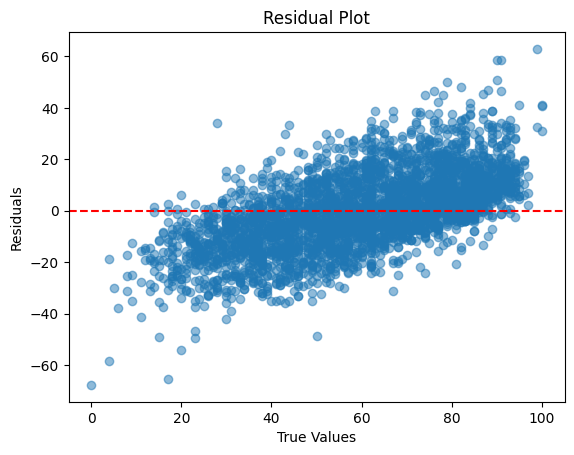

In [61]:
# Residual Analysis
residuals = y_test - ensemble_model.predict(X_test_scaled)
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()


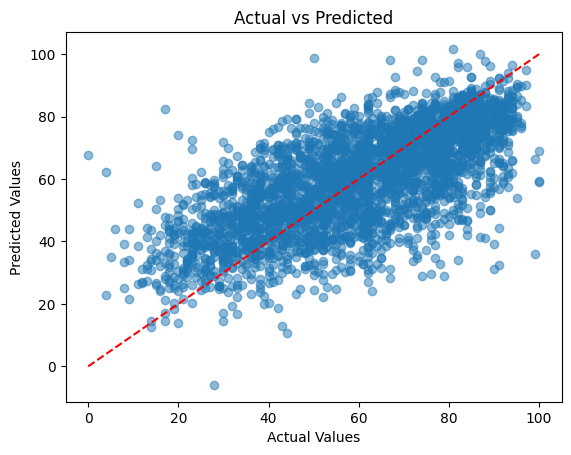

In [62]:
# Actual vs Predicted
plt.scatter(y_test, ensemble_model.predict(X_test_scaled), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
